In [1]:
"""
Fine-grained classification practice with Flower-17
"""

# Python Packages
import argparse
import os
import time
# 3rd Party Packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# User Packages
from start.preprocessing import ImageToTensorPreprocessor, ResizePreprocessor
from start.loader import ImageDataset
from start.model import MiniVGGNet


In [2]:
# Load Flowers-17 dataset
dataset = ImageDataset(
    preprocessors=[
        ResizePreprocessor(64, 64, aspect_preserving=True),
        ImageToTensorPreprocessor()
    ]
)
(data, labels) = dataset.load(
    dataset_path=r'/home/share/dataset/flowers17',
    verbosity=80
)

print('data shape: {}'.format(data.shape))
print('labels shape: {}'.format(labels.shape))

classes = set(labels)



[INFO] Processing label: dandelion
[INFO] processed 80 dandelion images
[INFO] Processing label: coltsfoot


[INFO] processed 80 coltsfoot images
[INFO] Processing label: lilyvalley
[INFO] processed 80 lilyvalley images
[INFO] Processing label: cowslip


[INFO] processed 80 cowslip images
[INFO] Processing label: iris
[INFO] processed 80 iris images
[INFO] Processing label: snowdrop


[INFO] processed 80 snowdrop images
[INFO] Processing label: sunflower
[INFO] processed 80 sunflower images
[INFO] Processing label: tigerlily


[INFO] processed 80 tigerlily images
[INFO] Processing label: daisy
[INFO] processed 80 daisy images
[INFO] Processing label: pansy


[INFO] processed 80 pansy images
[INFO] Processing label: crocus
[INFO] processed 80 crocus images
[INFO] Processing label: daffodil


[INFO] processed 80 daffodil images
[INFO] Processing label: fritillary
[INFO] processed 80 fritillary images
[INFO] Processing label: buttercup


[INFO] processed 80 buttercup images
[INFO] Processing label: windflower
[INFO] processed 80 windflower images
[INFO] Processing label: files.txt
[INFO] Processing label: tulip


[INFO] processed 80 tulip images
[INFO] Processing label: bluebell
[INFO] processed 80 bluebell images
data shape: (1360, 64, 64, 3)
labels shape: (1360,)


In [3]:
# Setup data splits
# Normalize data
data = data.astype(np.float) / 255.0
# Partition into train and test splits
(trainX, testX, trainY, testY) = train_test_split(
    data, labels,
    test_size=0.25, random_state=int(time.time())
)

# Binarize output to one hot vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

# Data augmentation
augmenter = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
# Initialize the optimizer and model
print('[INFO] compiling model...')
opt = SGD(lr=0.05)
properties = {
    'width':    64,
    'height':   64,
    'channels': 3,
    'classes':  len(classes)
}
model = MiniVGGNet.build(properties)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)
model.summary()

[INFO] compiling model...


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
__________

In [5]:
# Train the network
print('[INFO] training network...')
history = model.fit_generator(
    augmenter.flow(trainX, trainY, batch_size=32),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // 32,
    epochs=100,
    verbose=1
)

[INFO] training network...


Epoch 1/100


 1/31 [..............................] - ETA: 35s - loss: 4.1696 - acc: 0.1250

 5/31 [===>..........................] - ETA: 6s - loss: 4.3578 - acc: 0.1313 

 9/31 [=======>......................] - ETA: 3s - loss: 4.1063 - acc: 0.1181

14/31 [============>.................] - ETA: 1s - loss: 4.0285 - acc: 0.1228

18/31 [================>.............] - ETA: 1s - loss: 4.0758 - acc: 0.1262

23/31 [=====================>........] - ETA: 0s - loss: 3.9617 - acc: 0.1368

28/31 [==========================>...] - ETA: 0s - loss: 3.8343 - acc: 0.1425

31/31 [==============================] - 2s 56ms/step - loss: 3.7289 - acc: 0.1550 - val_loss: 4.0270 - val_acc: 0.0971


Epoch 2/100
 1/31 [..............................] - ETA: 0s - loss: 3.4356 - acc: 0.0938

 2/31 [>.............................] - ETA: 2s - loss: 3.1179 - acc: 0.2188

 5/31 [===>..........................] - ETA: 1s - loss: 3.1480 - acc: 0.2250

 9/31 [=======>......................] - ETA: 0s - loss: 3.1058 - acc: 0.2222

13/31 [===========>..................] - ETA: 0s - loss: 3.1177 - acc: 0.2091

17/31 [===============>..............] - ETA: 0s - loss: 3.0136 - acc: 0.2243

21/31 [===================>..........] - ETA: 0s - loss: 2.9263 - acc: 0.2398

25/31 [=======================>......] - ETA: 0s - loss: 2.8959 - acc: 0.2414

29/31 [===========================>..] - ETA: 0s - loss: 2.8594 - acc: 0.2415

31/31 [==============================] - 1s 21ms/step - loss: 2.8397 - acc: 0.2461 - val_loss: 3.4743 - val_acc: 0.1353


Epoch 3/100
 1/31 [..............................] - ETA: 0s - loss: 2.6622 - acc: 0.2188

 3/31 [=>............................] - ETA: 1s - loss: 2.3244 - acc: 0.2708

 6/31 [====>.........................] - ETA: 0s - loss: 2.4528 - acc: 0.2708

10/31 [========>.....................] - ETA: 0s - loss: 2.4791 - acc: 0.2812

14/31 [============>.................] - ETA: 0s - loss: 2.4274 - acc: 0.3096

18/31 [================>.............] - ETA: 0s - loss: 2.4536 - acc: 0.3085

22/31 [====================>.........] - ETA: 0s - loss: 2.5152 - acc: 0.3007

26/31 [========================>.....] - ETA: 0s - loss: 2.5076 - acc: 0.3013

30/31 [============================>.] - ETA: 0s - loss: 2.4680 - acc: 0.3049

31/31 [==============================] - 1s 22ms/step - loss: 2.4698 - acc: 0.3062 - val_loss: 2.2936 - val_acc: 0.2412


Epoch 4/100
 1/31 [..............................] - ETA: 0s - loss: 2.1315 - acc: 0.3438

 4/31 [==>...........................] - ETA: 0s - loss: 2.6034 - acc: 0.3281

 8/31 [======>.......................] - ETA: 0s - loss: 2.4137 - acc: 0.3438

12/31 [==========>...................] - ETA: 0s - loss: 2.3585 - acc: 0.3389

16/31 [==============>...............] - ETA: 0s - loss: 2.3469 - acc: 0.3421

20/31 [==================>...........] - ETA: 0s - loss: 2.3231 - acc: 0.3362

23/31 [=====================>........] - ETA: 0s - loss: 2.2910 - acc: 0.3385

27/31 [=========================>....] - ETA: 0s - loss: 2.2820 - acc: 0.3404

31/31 [==============================] - 1s 18ms/step - loss: 2.2630 - acc: 0.3469 - val_loss: 2.6784 - val_acc: 0.2471


Epoch 5/100
 1/31 [..............................] - ETA: 0s - loss: 2.3012 - acc: 0.3125

 5/31 [===>..........................] - ETA: 0s - loss: 2.0916 - acc: 0.3875

 8/31 [======>.......................] - ETA: 0s - loss: 2.0484 - acc: 0.3906

12/31 [==========>...................] - ETA: 0s - loss: 2.0875 - acc: 0.3932

16/31 [==============>...............] - ETA: 0s - loss: 2.0964 - acc: 0.3864

20/31 [==================>...........] - ETA: 0s - loss: 2.0729 - acc: 0.3842

24/31 [======================>.......] - ETA: 0s - loss: 2.0333 - acc: 0.3983

28/31 [==========================>...] - ETA: 0s - loss: 2.0478 - acc: 0.3972

31/31 [==============================] - 1s 18ms/step - loss: 2.0609 - acc: 0.3990 - val_loss: 2.2959 - val_acc: 0.2794


Epoch 6/100
 1/31 [..............................] - ETA: 0s - loss: 1.9325 - acc: 0.3750

 6/31 [====>.........................] - ETA: 0s - loss: 1.9331 - acc: 0.4375

10/31 [========>.....................] - ETA: 0s - loss: 1.9560 - acc: 0.4188

14/31 [============>.................] - ETA: 0s - loss: 1.9245 - acc: 0.4069

18/31 [================>.............] - ETA: 0s - loss: 1.8801 - acc: 0.4154

21/31 [===================>..........] - ETA: 0s - loss: 1.8728 - acc: 0.4111

25/31 [=======================>......] - ETA: 0s - loss: 1.8582 - acc: 0.4179

29/31 [===========================>..] - ETA: 0s - loss: 1.8669 - acc: 0.4173

31/31 [==============================] - 1s 18ms/step - loss: 1.8822 - acc: 0.4176 - val_loss: 2.0989 - val_acc: 0.3147


Epoch 7/100
 1/31 [..............................] - ETA: 0s - loss: 1.9826 - acc: 0.4375

 5/31 [===>..........................] - ETA: 0s - loss: 2.0080 - acc: 0.3625

 7/31 [=====>........................] - ETA: 0s - loss: 1.8139 - acc: 0.4286

10/31 [========>.....................] - ETA: 0s - loss: 1.8996 - acc: 0.4344

14/31 [============>.................] - ETA: 0s - loss: 1.9337 - acc: 0.4286

18/31 [================>.............] - ETA: 0s - loss: 1.8918 - acc: 0.4444

22/31 [====================>.........] - ETA: 0s - loss: 1.8647 - acc: 0.4432

26/31 [========================>.....] - ETA: 0s - loss: 1.9148 - acc: 0.4351

30/31 [============================>.] - ETA: 0s - loss: 1.9214 - acc: 0.4333

31/31 [==============================] - 1s 19ms/step - loss: 1.9058 - acc: 0.4335 - val_loss: 2.1190 - val_acc: 0.3559


Epoch 8/100


 1/31 [..............................] - ETA: 0s - loss: 2.4025 - acc: 0.2812

 5/31 [===>..........................] - ETA: 0s - loss: 1.9561 - acc: 0.4491

 8/31 [======>.......................] - ETA: 0s - loss: 2.0104 - acc: 0.4291

11/31 [=========>....................] - ETA: 0s - loss: 1.9667 - acc: 0.4314

14/31 [============>.................] - ETA: 0s - loss: 1.9456 - acc: 0.4394

18/31 [================>.............] - ETA: 0s - loss: 1.9304 - acc: 0.4511

22/31 [====================>.........] - ETA: 0s - loss: 1.9151 - acc: 0.4444

26/31 [========================>.....] - ETA: 0s - loss: 1.9385 - acc: 0.4409

29/31 [===========================>..] - ETA: 0s - loss: 1.9097 - acc: 0.4481

31/31 [==============================] - 1s 22ms/step - loss: 1.8922 - acc: 0.4495 - val_loss: 1.5088 - val_acc: 0.4794


Epoch 9/100


 1/31 [..............................] - ETA: 0s - loss: 2.4098 - acc: 0.4062

 5/31 [===>..........................] - ETA: 0s - loss: 1.7902 - acc: 0.4188

 9/31 [=======>......................] - ETA: 0s - loss: 1.7192 - acc: 0.4534

12/31 [==========>...................] - ETA: 0s - loss: 1.7207 - acc: 0.4364

16/31 [==============>...............] - ETA: 0s - loss: 1.7720 - acc: 0.4367

20/31 [==================>...........] - ETA: 0s - loss: 1.7710 - acc: 0.4400

24/31 [======================>.......] - ETA: 0s - loss: 1.7666 - acc: 0.4382

28/31 [==========================>...] - ETA: 0s - loss: 1.7509 - acc: 0.4526

31/31 [==============================] - 1s 22ms/step - loss: 1.7727 - acc: 0.4471 - val_loss: 1.8288 - val_acc: 0.4176


Epoch 10/100
 1/31 [..............................] - ETA: 0s - loss: 1.3549 - acc: 0.5312

 6/31 [====>.........................] - ETA: 0s - loss: 1.6441 - acc: 0.5000

10/31 [========>.....................] - ETA: 0s - loss: 1.6668 - acc: 0.4906

13/31 [===========>..................] - ETA: 0s - loss: 1.6976 - acc: 0.4976

17/31 [===============>..............] - ETA: 0s - loss: 1.6953 - acc: 0.4945

21/31 [===================>..........] - ETA: 0s - loss: 1.6522 - acc: 0.4985

25/31 [=======================>......] - ETA: 0s - loss: 1.6703 - acc: 0.4975

29/31 [===========================>..] - ETA: 0s - loss: 1.6707 - acc: 0.4914

31/31 [==============================] - 1s 18ms/step - loss: 1.6796 - acc: 0.4889 - val_loss: 1.5874 - val_acc: 0.4676


Epoch 11/100
 1/31 [..............................] - ETA: 0s - loss: 2.1684 - acc: 0.4375

 6/31 [====>.........................] - ETA: 0s - loss: 1.9790 - acc: 0.4457

11/31 [=========>....................] - ETA: 0s - loss: 1.8932 - acc: 0.4363

14/31 [============>.................] - ETA: 0s - loss: 1.8501 - acc: 0.4365

17/31 [===============>..............] - ETA: 0s - loss: 1.8009 - acc: 0.4459

21/31 [===================>..........] - ETA: 0s - loss: 1.7781 - acc: 0.4607

25/31 [=======================>......] - ETA: 0s - loss: 1.7412 - acc: 0.4620

29/31 [===========================>..] - ETA: 0s - loss: 1.7161 - acc: 0.4660

31/31 [==============================] - 1s 20ms/step - loss: 1.7143 - acc: 0.4641 - val_loss: 1.4016 - val_acc: 0.5353


Epoch 12/100
 1/31 [..............................] - ETA: 0s - loss: 1.2520 - acc: 0.5938

 5/31 [===>..........................] - ETA: 0s - loss: 1.3972 - acc: 0.5625

10/31 [========>.....................] - ETA: 0s - loss: 1.4387 - acc: 0.5437

12/31 [==========>...................] - ETA: 0s - loss: 1.4811 - acc: 0.5391

15/31 [=============>................] - ETA: 0s - loss: 1.5101 - acc: 0.5354

19/31 [=================>............] - ETA: 0s - loss: 1.5816 - acc: 0.5197

22/31 [====================>.........] - ETA: 0s - loss: 1.5576 - acc: 0.5213

26/31 [========================>.....] - ETA: 0s - loss: 1.5707 - acc: 0.5192

30/31 [============================>.] - ETA: 0s - loss: 1.5425 - acc: 0.5219

31/31 [==============================] - 1s 21ms/step - loss: 1.5346 - acc: 0.5222 - val_loss: 1.5080 - val_acc: 0.5294


Epoch 13/100


 1/31 [..............................] - ETA: 0s - loss: 1.5852 - acc: 0.4688

 6/31 [====>.........................] - ETA: 0s - loss: 1.6385 - acc: 0.4896

11/31 [=========>....................] - ETA: 0s - loss: 1.5655 - acc: 0.5016

13/31 [===========>..................] - ETA: 0s - loss: 1.5937 - acc: 0.5086

16/31 [==============>...............] - ETA: 0s - loss: 1.6006 - acc: 0.4894

20/31 [==================>...........] - ETA: 0s - loss: 1.6305 - acc: 0.4712

23/31 [=====================>........] - ETA: 0s - loss: 1.6237 - acc: 0.4736

27/31 [=========================>....] - ETA: 0s - loss: 1.6046 - acc: 0.4821

31/31 [==============================] - 1s 21ms/step - loss: 1.6146 - acc: 0.4797 - val_loss: 1.4652 - val_acc: 0.5147


Epoch 14/100
 1/31 [..............................] - ETA: 0s - loss: 1.8414 - acc: 0.4062

 5/31 [===>..........................] - ETA: 0s - loss: 1.6841 - acc: 0.4313

10/31 [========>.....................] - ETA: 0s - loss: 1.6381 - acc: 0.4719

14/31 [============>.................] - ETA: 0s - loss: 1.6803 - acc: 0.4688

17/31 [===============>..............] - ETA: 0s - loss: 1.6692 - acc: 0.4706

21/31 [===================>..........] - ETA: 0s - loss: 1.6495 - acc: 0.4836

25/31 [=======================>......] - ETA: 0s - loss: 1.6386 - acc: 0.4873

28/31 [==========================>...] - ETA: 0s - loss: 1.6097 - acc: 0.4931

31/31 [==============================] - 1s 20ms/step - loss: 1.5928 - acc: 0.4999 - val_loss: 1.3757 - val_acc: 0.5676


Epoch 15/100
 1/31 [..............................] - ETA: 0s - loss: 1.2964 - acc: 0.4688

 5/31 [===>..........................] - ETA: 0s - loss: 1.3134 - acc: 0.5500

10/31 [========>.....................] - ETA: 0s - loss: 1.4676 - acc: 0.5125

14/31 [============>.................] - ETA: 0s - loss: 1.5225 - acc: 0.5067

15/31 [=============>................] - ETA: 0s - loss: 1.5276 - acc: 0.4979

18/31 [================>.............] - ETA: 0s - loss: 1.4754 - acc: 0.5122

22/31 [====================>.........] - ETA: 0s - loss: 1.5131 - acc: 0.5128

26/31 [========================>.....] - ETA: 0s - loss: 1.5093 - acc: 0.5108

29/31 [===========================>..] - ETA: 0s - loss: 1.5116 - acc: 0.5151

31/31 [==============================] - 1s 22ms/step - loss: 1.4849 - acc: 0.5192 - val_loss: 1.4086 - val_acc: 0.5735


Epoch 16/100
 1/31 [..............................] - ETA: 0s - loss: 1.3940 - acc: 0.6562

 6/31 [====>.........................] - ETA: 0s - loss: 1.4764 - acc: 0.5365

10/31 [========>.....................] - ETA: 0s - loss: 1.6229 - acc: 0.4951

14/31 [============>.................] - ETA: 0s - loss: 1.5623 - acc: 0.4876

16/31 [==============>...............] - ETA: 0s - loss: 1.5091 - acc: 0.5028

19/31 [=================>............] - ETA: 0s - loss: 1.4812 - acc: 0.5073

22/31 [====================>.........] - ETA: 0s - loss: 1.4711 - acc: 0.5077

26/31 [========================>.....] - ETA: 0s - loss: 1.4648 - acc: 0.5053

30/31 [============================>.] - ETA: 0s - loss: 1.4953 - acc: 0.5004

31/31 [==============================] - 1s 20ms/step - loss: 1.5031 - acc: 0.4974 - val_loss: 1.6217 - val_acc: 0.5235


Epoch 17/100
 1/31 [..............................] - ETA: 0s - loss: 1.6930 - acc: 0.3750

 5/31 [===>..........................] - ETA: 0s - loss: 1.3585 - acc: 0.5437

10/31 [========>.....................] - ETA: 0s - loss: 1.4619 - acc: 0.5281

14/31 [============>.................] - ETA: 0s - loss: 1.4537 - acc: 0.5268

17/31 [===============>..............] - ETA: 0s - loss: 1.4445 - acc: 0.5252

20/31 [==================>...........] - ETA: 0s - loss: 1.4299 - acc: 0.5417

23/31 [=====================>........] - ETA: 0s - loss: 1.4431 - acc: 0.5336

27/31 [=========================>....] - ETA: 0s - loss: 1.4301 - acc: 0.5332

31/31 [==============================] - 1s 22ms/step - loss: 1.4083 - acc: 0.5442 - val_loss: 1.4098 - val_acc: 0.5529


Epoch 18/100
 1/31 [..............................] - ETA: 0s - loss: 1.1274 - acc: 0.5312

 5/31 [===>..........................] - ETA: 0s - loss: 1.3437 - acc: 0.5625

10/31 [========>.....................] - ETA: 0s - loss: 1.4140 - acc: 0.5375

14/31 [============>.................] - ETA: 0s - loss: 1.4411 - acc: 0.5335

17/31 [===============>..............] - ETA: 0s - loss: 1.4334 - acc: 0.5312

18/31 [================>.............] - ETA: 0s - loss: 1.4226 - acc: 0.5295

21/31 [===================>..........] - ETA: 0s - loss: 1.4069 - acc: 0.5357

25/31 [=======================>......] - ETA: 0s - loss: 1.4269 - acc: 0.5337

29/31 [===========================>..] - ETA: 0s - loss: 1.4045 - acc: 0.5323

31/31 [==============================] - 1s 19ms/step - loss: 1.4156 - acc: 0.5292 - val_loss: 1.4787 - val_acc: 0.5706


Epoch 19/100
 1/31 [..............................] - ETA: 0s - loss: 1.8022 - acc: 0.4062

 5/31 [===>..........................] - ETA: 0s - loss: 1.6294 - acc: 0.5250

10/31 [========>.....................] - ETA: 0s - loss: 1.5248 - acc: 0.5156

14/31 [============>.................] - ETA: 0s - loss: 1.5188 - acc: 0.5022

18/31 [================>.............] - ETA: 0s - loss: 1.4977 - acc: 0.5208

19/31 [=================>............] - ETA: 0s - loss: 1.5030 - acc: 0.5148

22/31 [====================>.........] - ETA: 0s - loss: 1.5004 - acc: 0.5170

26/31 [========================>.....] - ETA: 0s - loss: 1.4665 - acc: 0.5252

29/31 [===========================>..] - ETA: 0s - loss: 1.4616 - acc: 0.5291

31/31 [==============================] - 1s 20ms/step - loss: 1.4685 - acc: 0.5314 - val_loss: 1.2699 - val_acc: 0.6118


Epoch 20/100
 1/31 [..............................] - ETA: 0s - loss: 1.2355 - acc: 0.5000

 5/31 [===>..........................] - ETA: 0s - loss: 1.3453 - acc: 0.5062

10/31 [========>.....................] - ETA: 0s - loss: 1.3146 - acc: 0.5281

14/31 [============>.................] - ETA: 0s - loss: 1.3534 - acc: 0.5335

17/31 [===============>..............] - ETA: 0s - loss: 1.3886 - acc: 0.5331

20/31 [==================>...........] - ETA: 0s - loss: 1.3728 - acc: 0.5406

23/31 [=====================>........] - ETA: 0s - loss: 1.3823 - acc: 0.5421

26/31 [========================>.....] - ETA: 0s - loss: 1.3838 - acc: 0.5385

30/31 [============================>.] - ETA: 0s - loss: 1.3821 - acc: 0.5375

31/31 [==============================] - 1s 22ms/step - loss: 1.3835 - acc: 0.5383 - val_loss: 1.2378 - val_acc: 0.5853


Epoch 21/100
 1/31 [..............................] - ETA: 0s - loss: 1.1861 - acc: 0.4375

 5/31 [===>..........................] - ETA: 0s - loss: 1.2450 - acc: 0.6000

10/31 [========>.....................] - ETA: 0s - loss: 1.3889 - acc: 0.5750

14/31 [============>.................] - ETA: 0s - loss: 1.3069 - acc: 0.5960

18/31 [================>.............] - ETA: 0s - loss: 1.3572 - acc: 0.5833

21/31 [===================>..........] - ETA: 0s - loss: 1.3923 - acc: 0.5742

24/31 [======================>.......] - ETA: 0s - loss: 1.3838 - acc: 0.5675

27/31 [=========================>....] - ETA: 0s - loss: 1.3672 - acc: 0.5693

31/31 [==============================] - 1s 19ms/step - loss: 1.3712 - acc: 0.5674 - val_loss: 1.3037 - val_acc: 0.5912


Epoch 22/100
 1/31 [..............................] - ETA: 0s - loss: 0.9566 - acc: 0.7500

 5/31 [===>..........................] - ETA: 0s - loss: 1.1683 - acc: 0.6312

10/31 [========>.....................] - ETA: 0s - loss: 1.3017 - acc: 0.5875

14/31 [============>.................] - ETA: 0s - loss: 1.2400 - acc: 0.5982

17/31 [===============>..............] - ETA: 0s - loss: 1.2065 - acc: 0.6103

21/31 [===================>..........] - ETA: 0s - loss: 1.2252 - acc: 0.6076

22/31 [====================>.........] - ETA: 0s - loss: 1.2111 - acc: 0.6069

25/31 [=======================>......] - ETA: 0s - loss: 1.1943 - acc: 0.6036

29/31 [===========================>..] - ETA: 0s - loss: 1.2194 - acc: 0.5947

31/31 [==============================] - 1s 18ms/step - loss: 1.2352 - acc: 0.5916 - val_loss: 1.2488 - val_acc: 0.6000


Epoch 23/100


 1/31 [..............................] - ETA: 0s - loss: 1.2909 - acc: 0.5312

 5/31 [===>..........................] - ETA: 0s - loss: 1.2789 - acc: 0.5875

10/31 [========>.....................] - ETA: 0s - loss: 1.2519 - acc: 0.5875

14/31 [============>.................] - ETA: 0s - loss: 1.2991 - acc: 0.5737

18/31 [================>.............] - ETA: 0s - loss: 1.3826 - acc: 0.5486

22/31 [====================>.........] - ETA: 0s - loss: 1.3711 - acc: 0.5540

23/31 [=====================>........] - ETA: 0s - loss: 1.3757 - acc: 0.5503

26/31 [========================>.....] - ETA: 0s - loss: 1.3799 - acc: 0.5493

30/31 [============================>.] - ETA: 0s - loss: 1.3512 - acc: 0.5570

31/31 [==============================] - 1s 19ms/step - loss: 1.3486 - acc: 0.5602 - val_loss: 1.2343 - val_acc: 0.5971


Epoch 24/100
 1/31 [..............................] - ETA: 0s - loss: 1.1152 - acc: 0.6250

 5/31 [===>..........................] - ETA: 0s - loss: 1.1545 - acc: 0.5938

 9/31 [=======>......................] - ETA: 0s - loss: 1.2623 - acc: 0.5729

13/31 [===========>..................] - ETA: 0s - loss: 1.2747 - acc: 0.5721

17/31 [===============>..............] - ETA: 0s - loss: 1.3170 - acc: 0.5643

21/31 [===================>..........] - ETA: 0s - loss: 1.3108 - acc: 0.5580

24/31 [======================>.......] - ETA: 0s - loss: 1.3375 - acc: 0.5534

27/31 [=========================>....] - ETA: 0s - loss: 1.3267 - acc: 0.5622

31/31 [==============================] - 1s 18ms/step - loss: 1.3024 - acc: 0.5602 - val_loss: 1.1980 - val_acc: 0.5941


Epoch 25/100
 1/31 [..............................] - ETA: 0s - loss: 1.4959 - acc: 0.4688

 5/31 [===>..........................] - ETA: 0s - loss: 1.2808 - acc: 0.5813

 9/31 [=======>......................] - ETA: 0s - loss: 1.3590 - acc: 0.5521

13/31 [===========>..................] - ETA: 0s - loss: 1.3351 - acc: 0.5577

17/31 [===============>..............] - ETA: 0s - loss: 1.2976 - acc: 0.5515

20/31 [==================>...........] - ETA: 0s - loss: 1.2847 - acc: 0.5563

24/31 [======================>.......] - ETA: 0s - loss: 1.2898 - acc: 0.5612

25/31 [=======================>......] - ETA: 0s - loss: 1.2937 - acc: 0.5587

28/31 [==========================>...] - ETA: 0s - loss: 1.3071 - acc: 0.5525

31/31 [==============================] - 1s 19ms/step - loss: 1.3045 - acc: 0.5565 - val_loss: 1.4783 - val_acc: 0.5647


Epoch 26/100
 1/31 [..............................] - ETA: 0s - loss: 1.1956 - acc: 0.5938

 5/31 [===>..........................] - ETA: 0s - loss: 1.3872 - acc: 0.5750

10/31 [========>.....................] - ETA: 0s - loss: 1.2719 - acc: 0.5844

14/31 [============>.................] - ETA: 0s - loss: 1.2739 - acc: 0.5810

18/31 [================>.............] - ETA: 0s - loss: 1.2335 - acc: 0.6064

21/31 [===================>..........] - ETA: 0s - loss: 1.2591 - acc: 0.5986

25/31 [=======================>......] - ETA: 0s - loss: 1.2516 - acc: 0.6004

26/31 [========================>.....] - ETA: 0s - loss: 1.2484 - acc: 0.6020

29/31 [===========================>..] - ETA: 0s - loss: 1.2501 - acc: 0.5990

31/31 [==============================] - 1s 22ms/step - loss: 1.2393 - acc: 0.6057 - val_loss: 1.1554 - val_acc: 0.6265


Epoch 27/100
 1/31 [..............................] - ETA: 0s - loss: 1.1219 - acc: 0.6250

 5/31 [===>..........................] - ETA: 0s - loss: 1.3100 - acc: 0.5500

10/31 [========>.....................] - ETA: 0s - loss: 1.2569 - acc: 0.5969

13/31 [===========>..................] - ETA: 0s - loss: 1.2918 - acc: 0.5938

17/31 [===============>..............] - ETA: 0s - loss: 1.2434 - acc: 0.5974

21/31 [===================>..........] - ETA: 0s - loss: 1.2126 - acc: 0.6012

25/31 [=======================>......] - ETA: 0s - loss: 1.2268 - acc: 0.6075

27/31 [=========================>....] - ETA: 0s - loss: 1.2230 - acc: 0.6088

30/31 [============================>.] - ETA: 0s - loss: 1.2262 - acc: 0.6055

31/31 [==============================] - 1s 22ms/step - loss: 1.2299 - acc: 0.6011 - val_loss: 1.1605 - val_acc: 0.6265


Epoch 28/100
 1/31 [..............................] - ETA: 0s - loss: 1.1722 - acc: 0.6250

 5/31 [===>..........................] - ETA: 0s - loss: 1.2154 - acc: 0.6375

 9/31 [=======>......................] - ETA: 0s - loss: 1.1713 - acc: 0.6285

13/31 [===========>..................] - ETA: 0s - loss: 1.1864 - acc: 0.6250

17/31 [===============>..............] - ETA: 0s - loss: 1.2025 - acc: 0.6103

20/31 [==================>...........] - ETA: 0s - loss: 1.2312 - acc: 0.5953

24/31 [======================>.......] - ETA: 0s - loss: 1.2409 - acc: 0.5846

28/31 [==========================>...] - ETA: 0s - loss: 1.2400 - acc: 0.5837

31/31 [==============================] - 1s 22ms/step - loss: 1.2339 - acc: 0.5867 - val_loss: 1.2420 - val_acc: 0.5971


Epoch 29/100
 1/31 [..............................] - ETA: 0s - loss: 1.3426 - acc: 0.5000

 5/31 [===>..........................] - ETA: 0s - loss: 1.2743 - acc: 0.5687

 9/31 [=======>......................] - ETA: 0s - loss: 1.2801 - acc: 0.5799

13/31 [===========>..................] - ETA: 0s - loss: 1.2894 - acc: 0.5745

17/31 [===============>..............] - ETA: 0s - loss: 1.2407 - acc: 0.5827

20/31 [==================>...........] - ETA: 0s - loss: 1.2602 - acc: 0.5844

24/31 [======================>.......] - ETA: 0s - loss: 1.2545 - acc: 0.5898

27/31 [=========================>....] - ETA: 0s - loss: 1.2470 - acc: 0.5926

29/31 [===========================>..] - ETA: 0s - loss: 1.2405 - acc: 0.5881

31/31 [==============================] - 1s 22ms/step - loss: 1.2309 - acc: 0.5905 - val_loss: 1.1753 - val_acc: 0.6029


Epoch 30/100
 1/31 [..............................] - ETA: 0s - loss: 1.3594 - acc: 0.5938

 5/31 [===>..........................] - ETA: 0s - loss: 1.0757 - acc: 0.6062

 9/31 [=======>......................] - ETA: 0s - loss: 1.1579 - acc: 0.6042

13/31 [===========>..................] - ETA: 0s - loss: 1.1415 - acc: 0.6082

17/31 [===============>..............] - ETA: 0s - loss: 1.1631 - acc: 0.6090

20/31 [==================>...........] - ETA: 0s - loss: 1.1806 - acc: 0.6083

24/31 [======================>.......] - ETA: 0s - loss: 1.2207 - acc: 0.5993

28/31 [==========================>...] - ETA: 0s - loss: 1.2395 - acc: 0.5996

30/31 [============================>.] - ETA: 0s - loss: 1.2348 - acc: 0.6024

31/31 [==============================] - 1s 18ms/step - loss: 1.2268 - acc: 0.6051 - val_loss: 1.2356 - val_acc: 0.6324


Epoch 31/100
 1/31 [..............................] - ETA: 0s - loss: 1.2071 - acc: 0.5312

 5/31 [===>..........................] - ETA: 0s - loss: 1.2023 - acc: 0.5563

10/31 [========>.....................] - ETA: 0s - loss: 1.1485 - acc: 0.5643

13/31 [===========>..................] - ETA: 0s - loss: 1.1619 - acc: 0.5711

16/31 [==============>...............] - ETA: 0s - loss: 1.2257 - acc: 0.5499

20/31 [==================>...........] - ETA: 0s - loss: 1.2124 - acc: 0.5618

24/31 [======================>.......] - ETA: 0s - loss: 1.2705 - acc: 0.5580

28/31 [==========================>...] - ETA: 0s - loss: 1.2850 - acc: 0.5564

31/31 [==============================] - 1s 18ms/step - loss: 1.2661 - acc: 0.5600 - val_loss: 1.1255 - val_acc: 0.6294


Epoch 32/100
 1/31 [..............................] - ETA: 0s - loss: 1.3970 - acc: 0.4688

 5/31 [===>..........................] - ETA: 0s - loss: 1.1229 - acc: 0.6188

 9/31 [=======>......................] - ETA: 0s - loss: 1.1284 - acc: 0.6181

13/31 [===========>..................] - ETA: 0s - loss: 1.1162 - acc: 0.6250

17/31 [===============>..............] - ETA: 0s - loss: 1.1561 - acc: 0.6232

21/31 [===================>..........] - ETA: 0s - loss: 1.1760 - acc: 0.6184

25/31 [=======================>......] - ETA: 0s - loss: 1.1680 - acc: 0.6170

29/31 [===========================>..] - ETA: 0s - loss: 1.1614 - acc: 0.6181

31/31 [==============================] - 1s 17ms/step - loss: 1.1431 - acc: 0.6236 - val_loss: 1.1850 - val_acc: 0.6235


Epoch 33/100
 1/31 [..............................] - ETA: 0s - loss: 1.2815 - acc: 0.6250

 5/31 [===>..........................] - ETA: 0s - loss: 1.1798 - acc: 0.6312

 9/31 [=======>......................] - ETA: 0s - loss: 1.1460 - acc: 0.6146

12/31 [==========>...................] - ETA: 0s - loss: 1.1612 - acc: 0.6172

16/31 [==============>...............] - ETA: 0s - loss: 1.1601 - acc: 0.6133

20/31 [==================>...........] - ETA: 0s - loss: 1.2103 - acc: 0.6078

24/31 [======================>.......] - ETA: 0s - loss: 1.1422 - acc: 0.6263

28/31 [==========================>...] - ETA: 0s - loss: 1.1786 - acc: 0.6138

31/31 [==============================] - 1s 18ms/step - loss: 1.1611 - acc: 0.6179 - val_loss: 1.2893 - val_acc: 0.6235


Epoch 34/100
 1/31 [..............................] - ETA: 0s - loss: 1.5399 - acc: 0.6250



 2/31 [>.............................] - ETA: 2s - loss: 1.1868 - acc: 0.6250

 5/31 [===>..........................] - ETA: 1s - loss: 1.2028 - acc: 0.6000

 9/31 [=======>......................] - ETA: 0s - loss: 1.1719 - acc: 0.6076

13/31 [===========>..................] - ETA: 0s - loss: 1.1908 - acc: 0.6082

17/31 [===============>..............] - ETA: 0s - loss: 1.1689 - acc: 0.6176

21/31 [===================>..........] - ETA: 0s - loss: 1.1142 - acc: 0.6310

25/31 [=======================>......] - ETA: 0s - loss: 1.1020 - acc: 0.6350

29/31 [===========================>..] - ETA: 0s - loss: 1.1311 - acc: 0.6304

31/31 [==============================] - 1s 23ms/step - loss: 1.1444 - acc: 0.6260 - val_loss: 1.1703 - val_acc: 0.6294


Epoch 35/100
 1/31 [..............................] - ETA: 0s - loss: 1.0592 - acc: 0.6562

 3/31 [=>............................] - ETA: 2s - loss: 1.1540 - acc: 0.5938

 6/31 [====>.........................] - ETA: 1s - loss: 1.0579 - acc: 0.6302

 9/31 [=======>......................] - ETA: 0s - loss: 1.0759 - acc: 0.6424

13/31 [===========>..................] - ETA: 0s - loss: 1.0911 - acc: 0.6442

17/31 [===============>..............] - ETA: 0s - loss: 1.0628 - acc: 0.6492

20/31 [==================>...........] - ETA: 0s - loss: 1.1128 - acc: 0.6377

24/31 [======================>.......] - ETA: 0s - loss: 1.1092 - acc: 0.6356

28/31 [==========================>...] - ETA: 0s - loss: 1.1421 - acc: 0.6240

31/31 [==============================] - 1s 24ms/step - loss: 1.1324 - acc: 0.6221 - val_loss: 1.1560 - val_acc: 0.6412


Epoch 36/100
 1/31 [..............................] - ETA: 0s - loss: 1.4380 - acc: 0.4375

 4/31 [==>...........................] - ETA: 1s - loss: 1.1705 - acc: 0.5703

 7/31 [=====>........................] - ETA: 0s - loss: 1.1415 - acc: 0.5580

11/31 [=========>....................] - ETA: 0s - loss: 1.0518 - acc: 0.6047

15/31 [=============>................] - ETA: 0s - loss: 1.0718 - acc: 0.6143

19/31 [=================>............] - ETA: 0s - loss: 1.0973 - acc: 0.6133

23/31 [=====================>........] - ETA: 0s - loss: 1.0892 - acc: 0.6234

27/31 [=========================>....] - ETA: 0s - loss: 1.0922 - acc: 0.6248

31/31 [==============================] - 1s 23ms/step - loss: 1.1028 - acc: 0.6299 - val_loss: 1.1784 - val_acc: 0.5971


Epoch 37/100
 1/31 [..............................] - ETA: 0s - loss: 1.6003 - acc: 0.5312

 5/31 [===>..........................] - ETA: 0s - loss: 1.1877 - acc: 0.6125

 8/31 [======>.......................] - ETA: 0s - loss: 1.1023 - acc: 0.6445

12/31 [==========>...................] - ETA: 0s - loss: 1.1248 - acc: 0.6510

15/31 [=============>................] - ETA: 0s - loss: 1.1207 - acc: 0.6479

19/31 [=================>............] - ETA: 0s - loss: 1.0481 - acc: 0.6694

22/31 [====================>.........] - ETA: 0s - loss: 1.1047 - acc: 0.6520

26/31 [========================>.....] - ETA: 0s - loss: 1.0907 - acc: 0.6478

30/31 [============================>.] - ETA: 0s - loss: 1.0924 - acc: 0.6479

31/31 [==============================] - 1s 21ms/step - loss: 1.1059 - acc: 0.6451 - val_loss: 1.2891 - val_acc: 0.5824


Epoch 38/100


 1/31 [..............................] - ETA: 0s - loss: 1.0080 - acc: 0.7812

 5/31 [===>..........................] - ETA: 0s - loss: 1.1897 - acc: 0.6438

 6/31 [====>.........................] - ETA: 1s - loss: 1.2156 - acc: 0.6302

 9/31 [=======>......................] - ETA: 0s - loss: 1.2106 - acc: 0.6215

12/31 [==========>...................] - ETA: 0s - loss: 1.2234 - acc: 0.6146

16/31 [==============>...............] - ETA: 0s - loss: 1.1944 - acc: 0.6172

19/31 [=================>............] - ETA: 0s - loss: 1.1369 - acc: 0.6349

23/31 [=====================>........] - ETA: 0s - loss: 1.1547 - acc: 0.6215

27/31 [=========================>....] - ETA: 0s - loss: 1.1622 - acc: 0.6139

31/31 [==============================] - 1s 23ms/step - loss: 1.1208 - acc: 0.6325 - val_loss: 1.1210 - val_acc: 0.6559


Epoch 39/100
 1/31 [..............................] - ETA: 0s - loss: 0.7218 - acc: 0.6875

 5/31 [===>..........................] - ETA: 0s - loss: 1.0285 - acc: 0.6375

 7/31 [=====>........................] - ETA: 0s - loss: 1.1043 - acc: 0.6161

10/31 [========>.....................] - ETA: 0s - loss: 1.1289 - acc: 0.6031

14/31 [============>.................] - ETA: 0s - loss: 1.1686 - acc: 0.6004

18/31 [================>.............] - ETA: 0s - loss: 1.1178 - acc: 0.6198

22/31 [====================>.........] - ETA: 0s - loss: 1.1599 - acc: 0.6053

26/31 [========================>.....] - ETA: 0s - loss: 1.1177 - acc: 0.6144

30/31 [============================>.] - ETA: 0s - loss: 1.1320 - acc: 0.6095

31/31 [==============================] - 1s 21ms/step - loss: 1.1265 - acc: 0.6141 - val_loss: 1.0415 - val_acc: 0.6765


Epoch 40/100


 1/31 [..............................] - ETA: 0s - loss: 0.9007 - acc: 0.6875

 5/31 [===>..........................] - ETA: 0s - loss: 0.9692 - acc: 0.6375

 8/31 [======>.......................] - ETA: 0s - loss: 0.9768 - acc: 0.6523

11/31 [=========>....................] - ETA: 0s - loss: 1.0011 - acc: 0.6449

15/31 [=============>................] - ETA: 0s - loss: 1.0373 - acc: 0.6354

19/31 [=================>............] - ETA: 0s - loss: 1.0550 - acc: 0.6431

22/31 [====================>.........] - ETA: 0s - loss: 1.0355 - acc: 0.6510

26/31 [========================>.....] - ETA: 0s - loss: 1.0152 - acc: 0.6518

30/31 [============================>.] - ETA: 0s - loss: 1.0201 - acc: 0.6534

31/31 [==============================] - 1s 19ms/step - loss: 1.0347 - acc: 0.6474 - val_loss: 1.1491 - val_acc: 0.6500


Epoch 41/100


 1/31 [..............................] - ETA: 0s - loss: 0.8280 - acc: 0.7500

 5/31 [===>..........................]

 - ETA: 0s - loss: 1.0463 - acc: 0.6500

 9/31 [=======>......................] - ETA: 0s - loss: 1.1168 - acc: 0.6389

12/31 [==========>...................] - ETA: 0s - loss: 1.0536 - acc: 0.6484

15/31 [=============>................] - ETA: 0s - loss: 1.0223 - acc: 0.6458

19/31 [=================>............] - ETA: 0s - loss: 1.0427 - acc: 0.6447

22/31 [====================>.........] - ETA: 0s - loss: 1.0543 - acc: 0.6477

26/31 [========================>.....] - ETA: 0s - loss: 1.0592 - acc: 0.6447

30/31 [============================>.] - ETA: 0s - loss: 1.0432 - acc: 0.6515

31/31 [==============================] - 1s 21ms/step - loss: 1.0388 - acc: 0.6496 - val_loss: 1.2400 - val_acc: 0.6206


Epoch 42/100


 1/31 [..............................] - ETA: 0s - loss: 1.3768 - acc: 0.5938

 5/31 [===>..........................] - ETA: 0s - loss: 1.3210 - acc: 0.5875

 9/31 [=======>......................] - ETA: 0s - loss: 1.3384 - acc: 0.5833

10/31 [========>.....................] - ETA: 0s - loss: 1.3551 - acc: 0.5719

13/31 [===========>..................] - ETA: 0s - loss: 1.3420 - acc: 0.5697

17/31 [===============>..............] - ETA: 0s - loss: 1.2499 - acc: 0.5956

21/31 [===================>..........] - ETA: 0s - loss: 1.2788 - acc: 0.5863

25/31 [=======================>......] - ETA: 0s - loss: 1.2346 - acc: 0.6012

29/31 [===========================>..] - ETA: 0s - loss: 1.2244 - acc: 0.6067

31/31 [==============================] - 1s 18ms/step - loss: 1.2176 - acc: 0.6048 - val_loss: 1.1584 - val_acc: 0.6353


Epoch 43/100
 1/31 [..............................] - ETA: 0s - loss: 0.8880 - acc: 0.6875

 5/31 [===>..........................] - ETA: 0s - loss: 1.2149 - acc: 0.6125

10/31 [========>.....................] - ETA: 0s - loss: 1.0656 - acc: 0.6594

11/31 [=========>....................] - ETA: 0s - loss: 1.0480 - acc: 0.6562

14/31 [============>.................] - ETA: 0s - loss: 1.0407 - acc: 0.6562

18/31 [================>.............] - ETA: 0s - loss: 1.0008 - acc: 0.6684

22/31 [====================>.........] - ETA: 0s - loss: 1.0581 - acc: 0.6477

26/31 [========================>.....] - ETA: 0s - loss: 1.0375 - acc: 0.6538

29/31 [===========================>..] - ETA: 0s - loss: 1.0423 - acc: 0.6498

31/31 [==============================] - 1s 18ms/step - loss: 1.0380 - acc: 0.6552 - val_loss: 1.1759 - val_acc: 0.6412


Epoch 44/100


 1/31 [..............................] - ETA: 0s - loss: 0.9790 - acc: 0.6562

 5/31 [===>..........................] - ETA: 0s - loss: 1.1972 - acc: 0.6000

10/31 [========>.....................] - ETA: 0s - loss: 1.1812 - acc: 0.6027

12/31 [==========>...................] - ETA: 0s - loss: 1.2113 - acc: 0.5986

15/31 [=============>................] - ETA: 0s - loss: 1.1991 - acc: 0.6039

18/31 [================>.............] - ETA: 0s - loss: 1.2158 - acc: 0.6004

22/31 [====================>.........] - ETA: 0s - loss: 1.1592 - acc: 0.6112

26/31 [========================>.....] - ETA: 0s - loss: 1.1024 - acc: 0.6265

30/31 [============================>.] - ETA: 0s - loss: 1.0806 - acc: 0.6368

31/31 [==============================] - 1s 23ms/step - loss: 1.0689 - acc: 0.6384 - val_loss: 1.0701 - val_acc: 0.6412


Epoch 45/100


 1/31 [..............................] - ETA: 0s - loss: 1.5302 - acc: 0.5625

 5/31 [===>..........................] - ETA: 0s - loss: 1.2786 - acc: 0.6000

10/31 [========>.....................] - ETA: 0s - loss: 1.1516 - acc: 0.6375

13/31 [===========>..................] - ETA: 0s - loss: 1.1597 - acc: 0.6226

16/31 [==============>...............] - ETA: 0s - loss: 1.1232 - acc: 0.6250

19/31 [=================>............] - ETA: 0s - loss: 1.1009 - acc: 0.6299

23/31 [=====================>........] - ETA: 0s - loss: 1.0784 - acc: 0.6335

26/31 [========================>.....] - ETA: 0s - loss: 1.0695 - acc: 0.6374

30/31 [============================>.] - ETA: 0s - loss: 1.0566 - acc: 0.6451

31/31 [==============================] - 1s 23ms/step - loss: 1.0478 - acc: 0.6465 - val_loss: 1.1924 - val_acc: 0.6441


Epoch 46/100


 1/31 [..............................] - ETA: 0s - loss: 1.1430 - acc: 0.6562

 5/31 [===>..........................] - ETA: 0s - loss: 1.0593 - acc: 0.6250

10/31 [========>.....................] - ETA: 0s - loss: 1.0533 - acc: 0.6406

14/31 [============>.................] - ETA: 0s - loss: 1.0855 - acc: 0.6295

17/31 [===============>..............] - ETA: 0s - loss: 1.0692 - acc: 0.6360

21/31 [===================>..........] - ETA: 0s - loss: 1.0252 - acc: 0.6443

25/31 [=======================>......] - ETA: 0s - loss: 1.0186 - acc: 0.6562

29/31 [===========================>..] - ETA: 0s - loss: 1.0381 - acc: 0.6487

31/31 [==============================] - 1s 23ms/step - loss: 1.0391 - acc: 0.6492 - val_loss: 1.1057 - val_acc: 0.6441


Epoch 47/100
 1/31 [..............................] - ETA: 0s - loss: 0.6493 - acc: 0.7188

 5/31 [===>..........................] - ETA: 0s - loss: 0.8932 - acc: 0.6562

 9/31 [=======>......................] - ETA: 0s - loss: 0.9991 - acc: 0.6354

12/31 [==========>...................] - ETA: 0s - loss: 0.9527 - acc: 0.6510

15/31 [=============>................] - ETA: 0s - loss: 1.0048 - acc: 0.6458

18/31 [================>.............] - ETA: 0s - loss: 0.9935 - acc: 0.6562

21/31 [===================>..........] - ETA: 0s - loss: 0.9657 - acc: 0.6592

25/31 [=======================>......] - ETA: 0s - loss: 0.9499 - acc: 0.6663

29/31 [===========================>..] - ETA: 0s - loss: 0.9824 - acc: 0.6584

31/31 [==============================] - 1s 23ms/step - loss: 0.9712 - acc: 0.6613 - val_loss: 1.1382 - val_acc: 0.6235


Epoch 48/100
 1/31 [..............................] - ETA: 0s - loss: 0.8892 - acc: 0.6875

 5/31 [===>..........................] - ETA: 0s - loss: 1.1700 - acc: 0.6250



 9/31 [=======>......................] - ETA: 0s - loss: 1.0195 - acc: 0.6771

13/31 [===========>..................] - ETA: 0s - loss: 1.0078 - acc: 0.6731

16/31 [==============>...............] - ETA: 0s - loss: 0.9733 - acc: 0.6769

19/31 [=================>............] - ETA: 0s - loss: 0.9786 - acc: 0.6783

22/31 [====================>.........] - ETA: 0s - loss: 0.9675 - acc: 0.6810

25/31 [=======================>......] - ETA: 0s - loss: 0.9757 - acc: 0.6780

28/31 [==========================>...] - ETA: 0s - loss: 0.9603 - acc: 0.6813

31/31 [==============================] - 1s 22ms/step - loss: 0.9584 - acc: 0.6799 - val_loss: 0.9574 - val_acc: 0.6824


Epoch 49/100


 1/31 [..............................] - ETA: 0s - loss: 0.7148 - acc: 0.7812

 5/31 [===>..........................] - ETA: 0s - loss: 0.8787 - acc: 0.7125

 9/31 [=======>......................] - ETA: 0s - loss: 0.9372 - acc: 0.6875

13/31 [===========>..................] - ETA: 0s - loss: 0.9590 - acc: 0.6875

17/31 [===============>..............] - ETA: 0s - loss: 0.9623 - acc: 0.6893

20/31 [==================>...........] - ETA: 0s - loss: 0.9512 - acc: 0.6891

23/31 [=====================>........] - ETA: 0s - loss: 0.9421 - acc: 0.6929

27/31 [=========================>....] - ETA: 0s - loss: 0.9473 - acc: 0.6887

31/31 [==============================] - 1s 23ms/step - loss: 0.9389 - acc: 0.6905 - val_loss: 1.1397 - val_acc: 0.6588


Epoch 50/100
 1/31 [..............................] - ETA: 0s - loss: 0.7522 - acc: 0.6875

 5/31 [===>..........................] - ETA: 0s - loss: 0.7832 - acc: 0.7107

10/31 [========>.....................] - ETA: 0s - loss: 0.9411 - acc: 0.6897

14/31 [============>.................] - ETA: 0s - loss: 0.9806 - acc: 0.6712

17/31 [===============>..............] - ETA: 0s - loss: 0.9666 - acc: 0.6723

18/31 [================>.............] - ETA: 0s - loss: 0.9617 - acc: 0.6662

21/31 [===================>..........] - ETA: 0s - loss: 0.9623 - acc: 0.6707

24/31 [======================>.......] - ETA: 0s - loss: 0.9233 - acc: 0.6832

28/31 [==========================>...] - ETA: 0s - loss: 0.9085 - acc: 0.6916

31/31 [==============================] - 1s 22ms/step - loss: 0.9063 - acc: 0.6923 - val_loss: 1.1378 - val_acc: 0.6294


Epoch 51/100
 1/31 [..............................] - ETA: 0s - loss: 1.5546 - acc: 0.5000

 5/31 [===>..........................] - ETA: 0s - loss: 1.3643 - acc: 0.5973

10/31 [========>.....................] - ETA: 0s - loss: 1.1231 - acc: 0.6237

14/31 [============>.................] - ETA: 0s - loss: 1.1038 - acc: 0.6330

18/31 [================>.............] - ETA: 0s - loss: 1.0949 - acc: 0.6347

19/31 [=================>............] - ETA: 0s - loss: 1.0641 - acc: 0.6424

22/31 [====================>.........] - ETA: 0s - loss: 1.0278 - acc: 0.6542

26/31 [========================>.....] - ETA: 0s - loss: 1.0293 - acc: 0.6520

30/31 [============================>.] - ETA: 0s - loss: 1.0246 - acc: 0.6515

31/31 [==============================] - 1s 19ms/step - loss: 1.0111 - acc: 0.6567 - val_loss: 1.3602 - val_acc: 0.5735


Epoch 52/100


 1/31 [..............................] - ETA: 0s - loss: 0.6123 - acc: 0.7812

 5/31 [===>..........................] - ETA: 0s - loss: 0.8433 - acc: 0.6937

10/31 [========>.....................] - ETA: 0s - loss: 0.8658 - acc: 0.7125

14/31 [============>.................] - ETA: 0s - loss: 0.8651 - acc: 0.7165

18/31 [================>.............] - ETA: 0s - loss: 0.9022 - acc: 0.7014

20/31 [==================>...........] - ETA: 0s - loss: 0.9180 - acc: 0.7031

23/31 [=====================>........] - ETA: 0s - loss: 0.8941 - acc: 0.7065

26/31 [========================>.....] - ETA: 0s - loss: 0.9142 - acc: 0.7007

29/31 [===========================>..] - ETA: 0s - loss: 0.8944 - acc: 0.7026

31/31 [==============================] - 1s 20ms/step - loss: 0.8960 - acc: 0.7002 - val_loss: 1.0074 - val_acc: 0.7000


Epoch 53/100
 1/31 [..............................] - ETA: 0s - loss: 0.7419 - acc: 0.7812

 5/31 [===>..........................] - ETA: 0s - loss: 0.8222 - acc: 0.7312

10/31 [========>.....................] - ETA: 0s - loss: 0.9559 - acc: 0.6875

14/31 [============>.................] - ETA: 0s - loss: 0.9977 - acc: 0.6696

18/31 [================>.............] - ETA: 0s - loss: 0.9759 - acc: 0.6823

21/31 [===================>..........] - ETA: 0s - loss: 0.9630 - acc: 0.6875

24/31 [======================>.......] - ETA: 0s - loss: 0.9696 - acc: 0.6823

28/31 [==========================>...] - ETA: 0s - loss: 0.9568 - acc: 0.6853

31/31 [==============================] - 1s 22ms/step - loss: 0.9438 - acc: 0.6855 - val_loss: 1.0486 - val_acc: 0.6735


Epoch 54/100
 1/31 [..............................] - ETA: 0s - loss: 0.9013 - acc: 0.7188

 5/31 [===>..........................] - ETA: 0s - loss: 0.9363 - acc: 0.7000

 9/31 [=======>......................] - ETA: 0s - loss: 0.9858 - acc: 0.6701

13/31 [===========>..................] - ETA: 0s - loss: 0.9949 - acc: 0.6562

17/31 [===============>..............] - ETA: 0s - loss: 0.9750 - acc: 0.6636

21/31 [===================>..........] - ETA: 0s - loss: 0.9598 - acc: 0.6756

22/31 [====================>.........] - ETA: 0s - loss: 0.9562 - acc: 0.6818

25/31 [=======================>......] - ETA: 0s - loss: 0.9897 - acc: 0.6725

28/31 [==========================>...] - ETA: 0s - loss: 1.0094 - acc: 0.6719

31/31 [==============================] - 1s 23ms/step - loss: 0.9936 - acc: 0.6754 - val_loss: 1.2840 - val_acc: 0.6324


Epoch 55/100


 1/31 [..............................] - ETA: 0s - loss: 1.3411 - acc: 0.5312

 5/31 [===>..........................] - ETA: 0s - loss: 1.1841 - acc: 0.6250

 9/31 [=======>......................] - ETA: 0s - loss: 1.0830 - acc: 0.6493

13/31 [===========>..................] - ETA: 0s - loss: 1.0072 - acc: 0.6635

16/31 [==============>...............] - ETA: 0s - loss: 0.9721 - acc: 0.6660

20/31 [==================>...........] - ETA: 0s - loss: 0.9822 - acc: 0.6540

23/31 [=====================>........] - ETA: 0s - loss: 0.9720 - acc: 0.6570

26/31 [========================>.....] - ETA: 0s - loss: 0.9409 - acc: 0.6654

30/31 [============================>.] - ETA: 0s - loss: 0.9510 - acc: 0.6673

31/31 [==============================] - 1s 22ms/step - loss: 0.9471 - acc: 0.6659 - val_loss: 1.4359 - val_acc: 0.6059


Epoch 56/100
 1/31 [..............................] - ETA: 0s - loss: 0.8615 - acc: 0.7812

 5/31 [===>..........................] - ETA: 0s - loss: 0.9856 - acc: 0.6875

10/31 [========>.....................] - ETA: 0s - loss: 0.9355 - acc: 0.6813

14/31 [============>.................] - ETA: 0s - loss: 0.9456 - acc: 0.6763

18/31 [================>.............] - ETA: 0s - loss: 0.9550 - acc: 0.6736

22/31 [====================>.........] - ETA: 0s - loss: 0.9399 - acc: 0.6804

24/31 [======================>.......] - ETA: 0s - loss: 0.9410 - acc: 0.6823

27/31 [=========================>....] - ETA: 0s - loss: 0.9323 - acc: 0.6817

31/31 [==============================] - 1s 18ms/step - loss: 0.9253 - acc: 0.6862 - val_loss: 1.0981 - val_acc: 0.6500


Epoch 57/100
 1/31 [..............................] - ETA: 0s - loss: 0.9241 - acc: 0.7500

 5/31 [===>..........................] - ETA: 0s - loss: 0.8547 - acc: 0.7500

 9/31 [=======>......................] - ETA: 0s - loss: 0.7929 - acc: 0.7569

13/31 [===========>..................] - ETA: 0s - loss: 0.8319 - acc: 0.7404

17/31 [===============>..............] - ETA: 0s - loss: 0.8476 - acc: 0.7335

20/31 [==================>...........] - ETA: 0s - loss: 0.8567 - acc: 0.7312

24/31 [======================>.......] - ETA: 0s - loss: 0.8767 - acc: 0.7279

25/31 [=======================>......] - ETA: 0s - loss: 0.8709 - acc: 0.7288

28/31 [==========================>...] - ETA: 0s - loss: 0.8719 - acc: 0.7299

31/31 [==============================] - 1s 20ms/step - loss: 0.8496 - acc: 0.7369 - val_loss: 0.9796 - val_acc: 0.6882


Epoch 58/100
 1/31 [..............................] - ETA: 0s - loss: 0.2959 - acc: 0.9062

 5/31 [===>..........................] - ETA: 0s - loss: 0.7657 - acc: 0.8063

 9/31 [=======>......................] - ETA: 0s - loss: 0.8483 - acc: 0.7584

13/31 [===========>..................] - ETA: 0s - loss: 0.8587 - acc: 0.7462

17/31 [===============>..............] - ETA: 0s - loss: 0.9484 - acc: 0.7103

21/31 [===================>..........] - ETA: 0s - loss: 0.9758 - acc: 0.7015

25/31 [=======================>......] - ETA: 0s - loss: 0.9898 - acc: 0.6918

26/31 [========================>.....] - ETA: 0s - loss: 0.9742 - acc: 0.6964

29/31 [===========================>..] - ETA: 0s - loss: 0.9657 - acc: 0.6977

31/31 [==============================] - 1s 21ms/step - loss: 0.9708 - acc: 0.6943 - val_loss: 1.1455 - val_acc: 0.6559


Epoch 59/100
 1/31 [..............................] - ETA: 0s - loss: 0.9035 - acc: 0.6562

 5/31 [===>..........................] - ETA: 0s - loss: 0.9808 - acc: 0.6562

 9/31 [=======>......................] - ETA: 0s - loss: 0.9133 - acc: 0.6875

13/31 [===========>..................] - ETA: 0s - loss: 0.9687 - acc: 0.6827

17/31 [===============>..............] - ETA: 0s - loss: 0.9725 - acc: 0.6783

21/31 [===================>..........] - ETA: 0s - loss: 0.9783 - acc: 0.6741

25/31 [=======================>......] - ETA: 0s - loss: 0.9635 - acc: 0.6850

27/31 [=========================>....] - ETA: 0s - loss: 0.9460 - acc: 0.6910

30/31 [============================>.] - ETA: 0s - loss: 0.9449 - acc: 0.6875

31/31 [==============================] - 1s 20ms/step - loss: 0.9396 - acc: 0.6895 - val_loss: 1.1478 - val_acc: 0.6265


Epoch 60/100
 1/31 [..............................] - ETA: 0s - loss: 0.4771 - acc: 0.8750

 5/31 [===>..........................] - ETA: 0s - loss: 0.8137 - acc: 0.7125

 9/31 [=======>......................] - ETA: 0s - loss: 0.8847 - acc: 0.7083

14/31 [============>.................] - ETA: 0s - loss: 0.8737 - acc: 0.7098

18/31 [================>.............] - ETA: 0s - loss: 0.8582 - acc: 0.7205

21/31 [===================>..........] - ETA: 0s - loss: 0.8934 - acc: 0.7068

25/31 [=======================>......] - ETA: 0s - loss: 0.8914 - acc: 0.7063

28/31 [==========================>...] - ETA: 0s - loss: 0.8779 - acc: 0.7109

31/31 [==============================] - 1s 21ms/step - loss: 0.8814 - acc: 0.7127 - val_loss: 1.2117 - val_acc: 0.6706


Epoch 61/100
 1/31 [..............................] - ETA: 0s - loss: 0.9516 - acc: 0.6562

 5/31 [===>..........................] - ETA: 0s - loss: 0.7389 - acc: 0.7580

 9/31 [=======>......................] - ETA: 0s - loss: 0.8387 - acc: 0.7336

13/31 [===========>..................] - ETA: 0s - loss: 0.8589 - acc: 0.7218

17/31 [===============>..............] - ETA: 0s - loss: 0.8973 - acc: 0.7009

21/31 [===================>..........] - ETA: 0s - loss: 0.8926 - acc: 0.6954

25/31 [=======================>......] - ETA: 0s - loss: 0.8894 - acc: 0.6991

28/31 [==========================>...] - ETA: 0s - loss: 0.9178 - acc: 0.6912

29/31 [===========================>..] - ETA: 0s - loss: 0.9105 - acc: 0.6932

31/31 [==============================] - 1s 20ms/step - loss: 0.8998 - acc: 0.6968 - val_loss: 1.0055 - val_acc: 0.7000


Epoch 62/100


 1/31 [..............................] - ETA: 0s - loss: 0.6362 - acc: 0.8438

 5/31 [===>..........................] - ETA: 0s - loss: 0.8760 - acc: 0.7545

10/31 [========>.....................] - ETA: 0s - loss: 0.8964 - acc: 0.7210

14/31 [============>.................] - ETA: 0s - loss: 0.8698 - acc: 0.7159

18/31 [================>.............] - ETA: 0s - loss: 0.9040 - acc: 0.7061

22/31 [====================>.........] - ETA: 0s - loss: 0.8547 - acc: 0.7141

26/31 [========================>.....] - ETA: 0s - loss: 0.8627 - acc: 0.7088

30/31 [============================>.] - ETA: 0s - loss: 0.8846 - acc: 0.7060

31/31 [==============================] - 1s 21ms/step - loss: 0.8803 - acc: 0.7044 - val_loss: 1.0406 - val_acc: 0.6588


Epoch 63/100
 1/31 [..............................] - ETA: 0s - loss: 0.7773 - acc: 0.7500

 5/31 [===>..........................] - ETA: 0s - loss: 0.6721 - acc: 0.7688

 9/31 [=======>......................] - ETA: 0s - loss: 0.6510 - acc: 0.7713

13/31 [===========>..................] - ETA: 0s - loss: 0.7290 - acc: 0.7455

17/31 [===============>..............] - ETA: 0s - loss: 0.7582 - acc: 0.7356

21/31 [===================>..........] - ETA: 0s - loss: 0.7909 - acc: 0.7205

25/31 [=======================>......] - ETA: 0s - loss: 0.8338 - acc: 0.7139

28/31 [==========================>...] - ETA: 0s - loss: 0.8210 - acc: 0.7189

31/31 [==============================] - 1s 19ms/step - loss: 0.8354 - acc: 0.7179 - val_loss: 0.9469 - val_acc: 0.6853


Epoch 64/100
 1/31 [..............................] - ETA: 0s - loss: 0.7618 - acc: 0.7188

 5/31 [===>..........................] - ETA: 0s - loss: 0.8287 - acc: 0.6687

 9/31 [=======>......................] - ETA: 0s - loss: 0.8446 - acc: 0.6979

13/31 [===========>..................] - ETA: 0s - loss: 0.8477 - acc: 0.6947

17/31 [===============>..............] - ETA: 0s - loss: 0.8547 - acc: 0.7017

20/31 [==================>...........] - ETA: 0s - loss: 0.8772 - acc: 0.7042

24/31 [======================>.......] - ETA: 0s - loss: 0.8922 - acc: 0.7041

27/31 [=========================>....] - ETA: 0s - loss: 0.8750 - acc: 0.7045

31/31 [==============================] - 1s 17ms/step - loss: 0.8644 - acc: 0.7074 - val_loss: 1.1182 - val_acc: 0.6618


Epoch 65/100
 1/31 [..............................] - ETA: 0s - loss: 1.4554 - acc: 0.6562

 5/31 [===>..........................] - ETA: 0s - loss: 1.0814 - acc: 0.6696

 9/31 [=======>......................] - ETA: 0s - loss: 0.9735 - acc: 0.6602

12/31 [==========>...................] - ETA: 0s - loss: 0.9778 - acc: 0.6618

16/31 [==============>...............] - ETA: 0s - loss: 0.8793 - acc: 0.6956

20/31 [==================>...........] - ETA: 0s - loss: 0.8929 - acc: 0.6924

24/31 [======================>.......] - ETA: 0s - loss: 0.8741 - acc: 0.7033

28/31 [==========================>...] - ETA: 0s - loss: 0.8667 - acc: 0.7100

31/31 [==============================] - 1s 18ms/step - loss: 0.8712 - acc: 0.7149 - val_loss: 1.1167 - val_acc: 0.6559


Epoch 66/100
 1/31 [..............................] - ETA: 0s - loss: 0.7519 - acc: 0.7500

 3/31 [=>............................] - ETA: 0s - loss: 0.8547 - acc: 0.7188

 6/31 [====>.........................] - ETA: 0s - loss: 0.8038 - acc: 0.7083

10/31 [========>.....................] - ETA: 0s - loss: 0.7836 - acc: 0.7156

14/31 [============>.................] - ETA: 0s - loss: 0.8136 - acc: 0.7188

18/31 [================>.............] - ETA: 0s - loss: 0.8317 - acc: 0.7118

22/31 [====================>.........] - ETA: 0s - loss: 0.8390 - acc: 0.7116

25/31 [=======================>......] - ETA: 0s - loss: 0.8246 - acc: 0.7188

29/31 [===========================>..] - ETA: 0s - loss: 0.8511 - acc: 0.7167

31/31 [==============================] - 1s 19ms/step - loss: 0.8383 - acc: 0.7239 - val_loss: 1.5568 - val_acc: 0.5559


Epoch 67/100


 1/31 [..............................] - ETA: 0s - loss: 1.0366 - acc: 0.6562

 3/31 [=>............................] - ETA: 1s - loss: 0.9702 - acc: 0.6250

 6/31 [====>.........................] - ETA: 0s - loss: 0.9902 - acc: 0.6458

 9/31 [=======>......................] - ETA: 0s - loss: 0.8636 - acc: 0.6875

13/31 [===========>..................] - ETA: 0s - loss: 0.8524 - acc: 0.6899

17/31 [===============>..............] - ETA: 0s - loss: 0.8277 - acc: 0.7059

21/31 [===================>..........] - ETA: 0s - loss: 0.8302 - acc: 0.7173

25/31 [=======================>......] - ETA: 0s - loss: 0.8072 - acc: 0.7241

28/31 [==========================>...] - ETA: 0s - loss: 0.8259 - acc: 0.7224

31/31 [==============================] - 1s 22ms/step - loss: 0.8179 - acc: 0.7241 - val_loss: 1.0560 - val_acc: 0.6794


Epoch 68/100


 1/31 [..............................] - ETA: 0s - loss: 1.0405 - acc: 0.6875

 4/31 [==>...........................] - ETA: 1s - loss: 0.7677 - acc: 0.7344

 7/31 [=====>........................] - ETA: 0s - loss: 0.8009 - acc: 0.7366

10/31 [========>.....................] - ETA: 0s - loss: 0.8028 - acc: 0.7344

14/31 [============>.................] - ETA: 0s - loss: 0.8431 - acc: 0.7162

18/31 [================>.............] - ETA: 0s - loss: 0.8196 - acc: 0.7220

22/31 [====================>.........] - ETA: 0s - loss: 0.8007 - acc: 0.7228

26/31 [========================>.....] - ETA: 0s - loss: 0.7865 - acc: 0.7270

29/31 [===========================>..] - ETA: 0s - loss: 0.7973 - acc: 0.7229

31/31 [==============================] - 1s 22ms/step - loss: 0.8102 - acc: 0.7196 - val_loss: 1.1477 - val_acc: 0.6676


Epoch 69/100


 1/31 [..............................] - ETA: 0s - loss: 1.3501 - acc: 0.6562

 5/31 [===>..........................] - ETA: 1s - loss: 1.0191 - acc: 0.6750

 8/31 [======>.......................] - ETA: 0s - loss: 0.9508 - acc: 0.6914

12/31 [==========>...................] - ETA: 0s - loss: 0.9577 - acc: 0.6927

16/31 [==============>...............] - ETA: 0s - loss: 0.9099 - acc: 0.6992

20/31 [==================>...........] - ETA: 0s - loss: 0.8932 - acc: 0.7063

24/31 [======================>.......] - ETA: 0s - loss: 0.8783 - acc: 0.7057

28/31 [==========================>...] - ETA: 0s - loss: 0.8837 - acc: 0.7020

31/31 [==============================] - 1s 22ms/step - loss: 0.8727 - acc: 0.7002 - val_loss: 1.0389 - val_acc: 0.6824


Epoch 70/100
 1/31 [..............................] - ETA: 0s - loss: 0.9866 - acc: 0.6875

 5/31 [===>..........................] - ETA: 0s - loss: 0.8371 - acc: 0.7000

 6/31 [====>.........................] - ETA: 0s - loss: 0.7706 - acc: 0.7240

 9/31 [=======>......................] - ETA: 0s - loss: 0.7842 - acc: 0.7257

12/31 [==========>...................] - ETA: 0s - loss: 0.7926 - acc: 0.7083

15/31 [=============>................] - ETA: 0s - loss: 0.8064 - acc: 0.7042

18/31 [================>.............] - ETA: 0s - loss: 0.7870 - acc: 0.7083

22/31 [====================>.........] - ETA: 0s - loss: 0.7771 - acc: 0.7173

26/31 [========================>.....] - ETA: 0s - loss: 0.7711 - acc: 0.7224

30/31 [============================>.] - ETA: 0s - loss: 0.8062 - acc: 0.7125

31/31 [==============================] - 1s 22ms/step - loss: 0.8022 - acc: 0.7147 - val_loss: 1.0464 - val_acc: 0.6912


Epoch 71/100


 1/31 [..............................] - ETA: 0s - loss: 0.8188 - acc: 0.6429

 5/31 [===>..........................] - ETA: 0s - loss: 0.9640 - acc: 0.6598

 7/31 [=====>........................] - ETA: 0s - loss: 0.8690 - acc: 0.6945

10/31 [========>.....................] - ETA: 0s - loss: 0.8444 - acc: 0.6955

13/31 [===========>..................] - ETA: 0s - loss: 0.8367 - acc: 0.7105

17/31 [===============>..............] - ETA: 0s - loss: 0.7868 - acc: 0.7198

20/31 [==================>...........] - ETA: 0s - loss: 0.7833 - acc: 0.7243

24/31 [======================>.......] - ETA: 0s - loss: 0.8030 - acc: 0.7169

28/31 [==========================>...] - ETA: 0s - loss: 0.8345 - acc: 0.7081

31/31 [==============================] - 1s 22ms/step - loss: 0.8233 - acc: 0.7142 - val_loss: 1.0655 - val_acc: 0.6882


Epoch 72/100
 1/31 [..............................] - ETA: 0s - loss: 0.9733 - acc: 0.7500

 5/31 [===>..........................] - ETA: 0s - loss: 1.0152 - acc: 0.6625

 8/31 [======>.......................] - ETA: 0s - loss: 0.9005 - acc: 0.6914

11/31 [=========>....................] - ETA: 0s - loss: 0.8160 - acc: 0.7216

15/31 [=============>................] - ETA: 0s - loss: 0.7969 - acc: 0.7292

19/31 [=================>............] - ETA: 0s - loss: 0.7620 - acc: 0.7434

23/31 [=====================>........] - ETA: 0s - loss: 0.7958 - acc: 0.7378

27/31 [=========================>....] - ETA: 0s - loss: 0.7966 - acc: 0.7338

31/31 [==============================] - 1s 17ms/step - loss: 0.7885 - acc: 0.7298 - val_loss: 1.0018 - val_acc: 0.6941


Epoch 73/100
 1/31 [..............................] - ETA: 0s - loss: 0.6708 - acc: 0.7500

 4/31 [==>...........................] - ETA: 0s - loss: 1.0541 - acc: 0.6719

 9/31 [=======>......................] - ETA: 0s - loss: 0.8992 - acc: 0.7118

12/31 [==========>...................] - ETA: 0s - loss: 0.8586 - acc: 0.7135

15/31 [=============>................] - ETA: 0s - loss: 0.8143 - acc: 0.7271

19/31 [=================>............] - ETA: 0s - loss: 0.7686 - acc: 0.7352

22/31 [====================>.........] - ETA: 0s - loss: 0.7858 - acc: 0.7330

25/31 [=======================>......] - ETA: 0s - loss: 0.7872 - acc: 0.7338

29/31 [===========================>..] - ETA: 0s - loss: 0.7933 - acc: 0.7252

31/31 [==============================] - 1s 21ms/step - loss: 0.7788 - acc: 0.7278 - val_loss: 1.0384 - val_acc: 0.7118


Epoch 74/100


 1/31 [..............................] - ETA: 0s - loss: 1.1487 - acc: 0.6562

 5/31 [===>..........................] - ETA: 0s - loss: 0.7640 - acc: 0.7562

10/31 [========>.....................] - ETA: 0s - loss: 0.8260 - acc: 0.7335

13/31 [===========>..................] - ETA: 0s - loss: 0.7899 - acc: 0.7493

16/31 [==============>...............] - ETA: 0s - loss: 0.7906 - acc: 0.7436

20/31 [==================>...........] - ETA: 0s - loss: 0.7934 - acc: 0.7417

23/31 [=====================>........] - ETA: 0s - loss: 0.7945 - acc: 0.7442

27/31 [=========================>....] - ETA: 0s - loss: 0.8040 - acc: 0.7393

31/31 [==============================] - 1s 20ms/step - loss: 0.7932 - acc: 0.7396 - val_loss: 0.9427 - val_acc: 0.7294


Epoch 75/100
 1/31 [..............................] - ETA: 0s - loss: 1.2751 - acc: 0.6562

 5/31 [===>..........................] - ETA: 0s - loss: 0.9674 - acc: 0.6741

 9/31 [=======>......................] - ETA: 0s - loss: 0.9753 - acc: 0.6870

11/31 [=========>....................] - ETA: 0s - loss: 0.9765 - acc: 0.6871

14/31 [============>.................] - ETA: 0s - loss: 0.9797 - acc: 0.6961

18/31 [================>.............] - ETA: 0s - loss: 0.9621 - acc: 0.6925

22/31 [====================>.........] - ETA: 0s - loss: 0.9441 - acc: 0.6887

26/31 [========================>.....] - ETA: 0s - loss: 0.9196 - acc: 0.7005

29/31 [===========================>..] - ETA: 0s - loss: 0.9140 - acc: 0.7067

31/31 [==============================] - 1s 21ms/step - loss: 0.8872 - acc: 0.7136 - val_loss: 1.0540 - val_acc: 0.6676


Epoch 76/100
 1/31 [..............................] - ETA: 0s - loss: 0.8291 - acc: 0.7188

 5/31 [===>..........................] - ETA: 0s - loss: 0.8248 - acc: 0.6937

10/31 [========>.....................] - ETA: 0s - loss: 0.7832 - acc: 0.7219

12/31 [==========>...................] - ETA: 0s - loss: 0.7998 - acc: 0.7083

15/31 [=============>................] - ETA: 0s - loss: 0.8155 - acc: 0.7104

19/31 [=================>............] - ETA: 0s - loss: 0.8273 - acc: 0.7171

23/31 [=====================>........] - ETA: 0s - loss: 0.7973 - acc: 0.7296

27/31 [=========================>....] - ETA: 0s - loss: 0.8154 - acc: 0.7211

30/31 [============================>.] - ETA: 0s - loss: 0.8039 - acc: 0.7271

31/31 [==============================] - 1s 23ms/step - loss: 0.7977 - acc: 0.7288 - val_loss: 1.0123 - val_acc: 0.6941


Epoch 77/100
 1/31 [..............................] - ETA: 0s - loss: 0.6330 - acc: 0.7812

 5/31 [===>..........................] - ETA: 0s - loss: 0.6598 - acc: 0.7937

10/31 [========>.....................] - ETA: 0s - loss: 0.6877 - acc: 0.7688

13/31 [===========>..................] - ETA: 0s - loss: 0.7272 - acc: 0.7668

16/31 [==============>...............] - ETA: 0s - loss: 0.7158 - acc: 0.7637

20/31 [==================>...........] - ETA: 0s - loss: 0.7084 - acc: 0.7672

24/31 [======================>.......] - ETA: 0s - loss: 0.7340 - acc: 0.7565

27/31 [=========================>....] - ETA: 0s - loss: 0.7349 - acc: 0.7546

31/31 [==============================] - 1s 23ms/step - loss: 0.7325 - acc: 0.7572 - val_loss: 0.9710 - val_acc: 0.7088


Epoch 78/100
 1/31 [..............................] - ETA: 0s - loss: 0.5921 - acc: 0.8125

 5/31 [===>..........................] - ETA: 0s - loss: 0.6469 - acc: 0.7562

 9/31 [=======>......................] - ETA: 0s - loss: 0.7134 - acc: 0.7743

13/31 [===========>..................] - ETA: 0s - loss: 0.6703 - acc: 0.7909

14/31 [============>.................] - ETA: 0s - loss: 0.6718 - acc: 0.7879

17/31 [===============>..............] - ETA: 0s - loss: 0.6911 - acc: 0.7776

20/31 [==================>...........] - ETA: 0s - loss: 0.6762 - acc: 0.7828

24/31 [======================>.......] - ETA: 0s - loss: 0.6831 - acc: 0.7734

28/31 [==========================>...] - ETA: 0s - loss: 0.6807 - acc: 0.7734

31/31 [==============================] - 1s 23ms/step - loss: 0.6764 - acc: 0.7752 - val_loss: 1.1668 - val_acc: 0.6912


Epoch 79/100
 1/31 [..............................] - ETA: 0s - loss: 0.8507 - acc: 0.6786

 5/31 [===>..........................] - ETA: 0s - loss: 0.7065 - acc: 0.7545

 9/31 [=======>......................] - ETA: 0s - loss: 0.6984 - acc: 0.7455

13/31 [===========>..................] - ETA: 0s - loss: 0.7393 - acc: 0.7445

15/31 [=============>................] - ETA: 0s - loss: 0.7516 - acc: 0.7432

18/31 [================>.............] - ETA: 0s - loss: 0.7364 - acc: 0.7530

21/31 [===================>..........] - ETA: 0s - loss: 0.7233 - acc: 0.7600

25/31 [=======================>......] - ETA: 0s - loss: 0.7049 - acc: 0.7650

28/31 [==========================>...] - ETA: 0s - loss: 0.7036 - acc: 0.7600

31/31 [==============================] - 1s 23ms/step - loss: 0.7010 - acc: 0.7560 - val_loss: 0.8993 - val_acc: 0.6971


Epoch 80/100
 1/31 [..............................] - ETA: 0s - loss: 0.4537 - acc: 0.8438

 5/31 [===>..........................] - ETA: 0s - loss: 0.8220 - acc: 0.7312

10/31 [========>.....................] - ETA: 0s - loss: 0.8263 - acc: 0.7375

14/31 [============>.................] - ETA: 0s - loss: 0.8389 - acc: 0.7299

16/31 [==============>...............] - ETA: 0s - loss: 0.8322 - acc: 0.7285

19/31 [=================>............] - ETA: 0s - loss: 0.8296 - acc: 0.7368

22/31 [====================>.........] - ETA: 0s - loss: 0.8084 - acc: 0.7457

26/31 [========================>.....] - ETA: 0s - loss: 0.8241 - acc: 0.7332

29/31 [===========================>..] - ETA: 0s - loss: 0.8266 - acc: 0.7306

31/31 [==============================] - 1s 23ms/step - loss: 0.8271 - acc: 0.7288 - val_loss: 1.3853 - val_acc: 0.6412


Epoch 81/100


 1/31 [..............................] - ETA: 0s - loss: 0.5899 - acc: 0.7500

 5/31 [===>..........................] - ETA: 0s - loss: 0.7948 - acc: 0.7312

 9/31 [=======>......................] - ETA: 0s - loss: 0.7426 - acc: 0.7465

13/31 [===========>..................] - ETA: 0s - loss: 0.6924 - acc: 0.7600

17/31 [===============>..............] - ETA: 0s - loss: 0.7251 - acc: 0.7539

20/31 [==================>...........] - ETA: 0s - loss: 0.7456 - acc: 0.7487

23/31 [=====================>........] - ETA: 0s - loss: 0.7712 - acc: 0.7420

27/31 [=========================>....] - ETA: 0s - loss: 0.7783 - acc: 0.7409

30/31 [============================>.] - ETA: 0s - loss: 0.7767 - acc: 0.7429

31/31 [==============================] - 1s 23ms/step - loss: 0.7731 - acc: 0.7441 - val_loss: 0.8917 - val_acc: 0.7206


Epoch 82/100
 1/31 [..............................] - ETA: 0s - loss: 0.5880 - acc: 0.8125

 5/31 [===>..........................] - ETA: 0s - loss: 0.7000 - acc: 0.7375

10/31 [========>.....................] - ETA: 0s - loss: 0.7785 - acc: 0.7531

14/31 [============>.................] - ETA: 0s - loss: 0.7493 - acc: 0.7522

17/31 [===============>..............] - ETA: 0s - loss: 0.7847 - acc: 0.7426

18/31 [================>.............] - ETA: 0s - loss: 0.7898 - acc: 0.7413

21/31 [===================>..........] - ETA: 0s - loss: 0.7605 - acc: 0.7500

24/31 [======================>.......] - ETA: 0s - loss: 0.7486 - acc: 0.7500

27/31 [=========================>....] - ETA: 0s - loss: 0.7471 - acc: 0.7569

31/31 [==============================] - 1s 23ms/step - loss: 0.7392 - acc: 0.7581 - val_loss: 1.0381 - val_acc: 0.6794


Epoch 83/100
 1/31 [..............................] - ETA: 0s - loss: 0.5438 - acc: 0.8438

 5/31 [===>..........................] - ETA: 0s - loss: 0.7386 - acc: 0.7562

10/31 [========>.....................] - ETA: 0s - loss: 0.7569 - acc: 0.7250

14/31 [============>.................] - ETA: 0s - loss: 0.7487 - acc: 0.7299

17/31 [===============>..............] - ETA: 0s - loss: 0.7390 - acc: 0.7279

19/31 [=================>............] - ETA: 0s - loss: 0.7493 - acc: 0.7286

22/31 [====================>.........] - ETA: 0s - loss: 0.7353 - acc: 0.7315

25/31 [=======================>......] - ETA: 0s - loss: 0.7388 - acc: 0.7300

29/31 [===========================>..] - ETA: 0s - loss: 0.7617 - acc: 0.7238

31/31 [==============================] - 1s 23ms/step - loss: 0.7515 - acc: 0.7306 - val_loss: 1.2566 - val_acc: 0.6382


Epoch 84/100


 1/31 [..............................] - ETA: 0s - loss: 0.5672 - acc: 0.7812

 4/31 [==>...........................] - ETA: 0s - loss: 0.7735 - acc: 0.7344

 8/31 [======>.......................] - ETA: 0s - loss: 0.7054 - acc: 0.7461

12/31 [==========>...................] - ETA: 0s - loss: 0.6783 - acc: 0.7552

17/31 [===============>..............] - ETA: 0s - loss: 0.6858 - acc: 0.7702

20/31 [==================>...........] - ETA: 0s - loss: 0.7046 - acc: 0.7641

23/31 [=====================>........] - ETA: 0s - loss: 0.7079 - acc: 0.7663

26/31 [========================>.....] - ETA: 0s - loss: 0.7065 - acc: 0.7632

30/31 [============================>.] - ETA: 0s - loss: 0.6937 - acc: 0.7698

31/31 [==============================] - 1s 22ms/step - loss: 0.6868 - acc: 0.7722 - val_loss: 0.9364 - val_acc: 0.7000


Epoch 85/100
 1/31 [..............................] - ETA: 0s - loss: 0.9992 - acc: 0.6562

 5/31 [===>..........................] - ETA: 0s - loss: 0.8044 - acc: 0.7312

 9/31 [=======>......................] - ETA: 0s - loss: 0.7376 - acc: 0.7500

13/31 [===========>..................] - ETA: 0s - loss: 0.7744 - acc: 0.7548

17/31 [===============>..............] - ETA: 0s - loss: 0.7637 - acc: 0.7610

20/31 [==================>...........] - ETA: 0s - loss: 0.7692 - acc: 0.7562

21/31 [===================>..........] - ETA: 0s - loss: 0.7701 - acc: 0.7530

24/31 [======================>.......] - ETA: 0s - loss: 0.7415 - acc: 0.7630

27/31 [=========================>....] - ETA: 0s - loss: 0.7451 - acc: 0.7650

31/31 [==============================] - 1s 23ms/step - loss: 0.7417 - acc: 0.7601 - val_loss: 1.3336 - val_acc: 0.6353


Epoch 86/100
 1/31 [..............................] - ETA: 0s - loss: 0.9143 - acc: 0.6875

 5/31 [===>..........................] - ETA: 0s - loss: 0.7410 - acc: 0.7375

 9/31 [=======>......................] - ETA: 0s - loss: 0.6720 - acc: 0.7500

13/31 [===========>..................] - ETA: 0s - loss: 0.7198 - acc: 0.7596

16/31 [==============>...............] - ETA: 0s - loss: 0.6990 - acc: 0.7578

20/31 [==================>...........] - ETA: 0s - loss: 0.7084 - acc: 0.7562

22/31 [====================>.........] - ETA: 0s - loss: 0.6914 - acc: 0.7642

25/31 [=======================>......] - ETA: 0s - loss: 0.6967 - acc: 0.7575

28/31 [==========================>...] - ETA: 0s - loss: 0.6946 - acc: 0.7578

31/31 [==============================] - 1s 23ms/step - loss: 0.7115 - acc: 0.7560 - val_loss: 1.0300 - val_acc: 0.6794


Epoch 87/100


 1/31 [..............................] - ETA: 0s - loss: 0.6751 - acc: 0.7812

 5/31 [===>..........................] - ETA: 0s - loss: 0.7840 - acc: 0.7063

10/31 [========>.....................] - ETA: 0s - loss: 0.7828 - acc: 0.7228

14/31 [============>.................] - ETA: 0s - loss: 0.7967 - acc: 0.7239

17/31 [===============>..............] - ETA: 0s - loss: 0.7836 - acc: 0.7266

21/31 [===================>..........] - ETA: 0s - loss: 0.7402 - acc: 0.7385

23/31 [=====================>........] - ETA: 0s - loss: 0.7490 - acc: 0.7409

26/31 [========================>.....] - ETA: 0s - loss: 0.7411 - acc: 0.7479

29/31 [===========================>..] - ETA: 0s - loss: 0.7160 - acc: 0.7535

31/31 [==============================] - 1s 23ms/step - loss: 0.7178 - acc: 0.7493 - val_loss: 0.9325 - val_acc: 0.6882


Epoch 88/100


 1/31 [..............................] - ETA: 0s - loss: 0.4955 - acc: 0.7812

 5/31 [===>..........................] - ETA: 0s - loss: 0.6895 - acc: 0.7357

 9/31 [=======>......................] - ETA: 0s - loss: 0.7336 - acc: 0.7282

14/31 [============>.................] - ETA: 0s - loss: 0.7348 - acc: 0.7427

18/31 [================>.............] - ETA: 0s - loss: 0.7500 - acc: 0.7408

22/31 [====================>.........] - ETA: 0s - loss: 0.7329 - acc: 0.7453

24/31 [======================>.......] - ETA: 0s - loss: 0.7104 - acc: 0.7522

27/31 [=========================>....] - ETA: 0s - loss: 0.6899 - acc: 0.7636

30/31 [============================>.] - ETA: 0s - loss: 0.6941 - acc: 0.7632

31/31 [==============================] - 1s 22ms/step - loss: 0.6933 - acc: 0.7618 - val_loss: 0.9759 - val_acc: 0.6941


Epoch 89/100
 1/31 [..............................] - ETA: 0s - loss: 0.8890 - acc: 0.5938

 5/31 [===>..........................] - ETA: 0s - loss: 0.6715 - acc: 0.7500

10/31 [========>.....................] - ETA: 0s - loss: 0.7250 - acc: 0.7317

14/31 [============>.................] - ETA: 0s - loss: 0.7114 - acc: 0.7414

18/31 [================>.............] - ETA: 0s - loss: 0.7609 - acc: 0.7346

22/31 [====================>.........] - ETA: 0s - loss: 0.7527 - acc: 0.7417

25/31 [=======================>......] - ETA: 0s - loss: 0.7831 - acc: 0.7364

28/31 [==========================>...] - ETA: 0s - loss: 0.7763 - acc: 0.7379

31/31 [==============================] - 1s 22ms/step - loss: 0.7761 - acc: 0.7360 - val_loss: 1.0644 - val_acc: 0.7000


Epoch 90/100
 1/31 [..............................] - ETA: 0s - loss: 0.8142 - acc: 0.7500

 5/31 [===>..........................] - ETA: 0s - loss: 0.6536 - acc: 0.7750

 9/31 [=======>......................] - ETA: 0s - loss: 0.6748 - acc: 0.7684

13/31 [===========>..................] - ETA: 0s - loss: 0.7043 - acc: 0.7675

17/31 [===============>..............] - ETA: 0s - loss: 0.6756 - acc: 0.7726

21/31 [===================>..........] - ETA: 0s - loss: 0.6863 - acc: 0.7653

25/31 [=======================>......] - ETA: 0s - loss: 0.6779 - acc: 0.7679

26/31 [========================>.....] - ETA: 0s - loss: 0.6808 - acc: 0.7660

29/31 [===========================>..] - ETA: 0s - loss: 0.6496 - acc: 0.7751

31/31 [==============================] - 1s 22ms/step - loss: 0.6372 - acc: 0.7805 - val_loss: 0.9884 - val_acc: 0.6941


Epoch 91/100
 1/31 [..............................] - ETA: 0s - loss: 0.7883 - acc: 0.7500

 5/31 [===>..........................] - ETA: 0s - loss: 0.6244 - acc: 0.7750

10/31 [========>.....................] - ETA: 0s - loss: 0.5718 - acc: 0.8031

13/31 [===========>..................] - ETA: 0s - loss: 0.6013 - acc: 0.7909

16/31 [==============>...............] - ETA: 0s - loss: 0.6206 - acc: 0.7910

19/31 [=================>............] - ETA: 0s - loss: 0.6009 - acc: 0.7993

23/31 [=====================>........] - ETA: 0s - loss: 0.6527 - acc: 0.7812

27/31 [=========================>....] - ETA: 0s - loss: 0.6809 - acc: 0.7662

30/31 [============================>.] - ETA: 0s - loss: 0.6807 - acc: 0.7656

31/31 [==============================] - 1s 19ms/step - loss: 0.6757 - acc: 0.7671 - val_loss: 1.1022 - val_acc: 0.6794


Epoch 92/100
 1/31 [..............................] - ETA: 0s - loss: 0.8888 - acc: 0.6875

 5/31 [===>..........................] - ETA: 0s - loss: 0.7113 - acc: 0.7500

 9/31 [=======>......................] - ETA: 0s - loss: 0.7067 - acc: 0.7500

13/31 [===========>..................] - ETA: 0s - loss: 0.6900 - acc: 0.7668

17/31 [===============>..............] - ETA: 0s - loss: 0.6755 - acc: 0.7702

21/31 [===================>..........] - ETA: 0s - loss: 0.6855 - acc: 0.7676

25/31 [=======================>......] - ETA: 0s - loss: 0.6798 - acc: 0.7698

28/31 [==========================>...] - ETA: 0s - loss: 0.6998 - acc: 0.7621

31/31 [==============================] - 1s 22ms/step - loss: 0.6881 - acc: 0.7670 - val_loss: 1.1476 - val_acc: 0.6588


Epoch 93/100
 1/31 [..............................] - ETA: 0s - loss: 0.7303 - acc: 0.8125

 5/31 [===>..........................] - ETA: 0s - loss: 0.6483 - acc: 0.7875

 9/31 [=======>......................] - ETA: 0s - loss: 0.6371 - acc: 0.7951

13/31 [===========>..................] - ETA: 0s - loss: 0.6101 - acc: 0.8005

17/31 [===============>..............] - ETA: 0s - loss: 0.6490 - acc: 0.7849

21/31 [===================>..........] - ETA: 0s - loss: 0.6663 - acc: 0.7842

25/31 [=======================>......] - ETA: 0s - loss: 0.6706 - acc: 0.7825

28/31 [==========================>...] - ETA: 0s - loss: 0.6823 - acc: 0.7712

29/31 [===========================>..] - ETA: 0s - loss: 0.6751 - acc: 0.7737

31/31 [==============================] - 1s 22ms/step - loss: 0.6775 - acc: 0.7723 - val_loss: 1.0337 - val_acc: 0.6676


Epoch 94/100
 1/31 [..............................] - ETA: 0s - loss: 0.6100 - acc: 0.6562

 5/31 [===>..........................] - ETA: 0s - loss: 0.9355 - acc: 0.6813

10/31 [========>.....................] - ETA: 0s - loss: 0.7823 - acc: 0.7344



14/31 [============>.................] - ETA: 0s - loss: 0.7360 - acc: 0.7455

17/31 [===============>..............] - ETA: 0s - loss: 0.7298 - acc: 0.7500

21/31 [===================>..........] - ETA: 0s - loss: 0.7233 - acc: 0.7530

25/31 [=======================>......] - ETA: 0s - loss: 0.7267 - acc: 0.7550

28/31 [==========================>...] - ETA: 0s - loss: 0.7253 - acc: 0.7522

30/31 [============================>.] - ETA: 0s - loss: 0.7308 - acc: 0.7500

31/31 [==============================] - 1s 22ms/step - loss: 0.7378 - acc: 0.7480 - val_loss: 1.0285 - val_acc: 0.7000


Epoch 95/100
 1/31 [..............................] - ETA: 0s - loss: 0.9421 - acc: 0.7188

 5/31 [===>..........................] - ETA: 0s - loss: 0.7290 - acc: 0.7625

 9/31 [=======>......................] - ETA: 0s - loss: 0.7142 - acc: 0.7733

13/31 [===========>..................] - ETA: 0s - loss: 0.7283 - acc: 0.7782

17/31 [===============>..............] - ETA: 0s - loss: 0.7519 - acc: 0.7623

21/31 [===================>..........] - ETA: 0s - loss: 0.7194 - acc: 0.7689

25/31 [=======================>......] - ETA: 0s - loss: 0.7009 - acc: 0.7696

29/31 [===========================>..] - ETA: 0s - loss: 0.7328 - acc: 0.7583

31/31 [==============================] - 1s 22ms/step - loss: 0.7379 - acc: 0.7568 - val_loss: 1.0699 - val_acc: 0.6971


Epoch 96/100
 1/31 [..............................] - ETA: 0s - loss: 0.7232 - acc: 0.6562

 5/31 [===>..........................] - ETA: 0s - loss: 0.7440 - acc: 0.7250

 9/31 [=======>......................] - ETA: 0s - loss: 0.7016 - acc: 0.7465

13/31 [===========>..................] - ETA: 0s - loss: 0.6741 - acc: 0.7596

17/31 [===============>..............] - ETA: 0s - loss: 0.6378 - acc: 0.7739

21/31 [===================>..........] - ETA: 0s - loss: 0.6377 - acc: 0.7693

25/31 [=======================>......] - ETA: 0s - loss: 0.6551 - acc: 0.7700

28/31 [==========================>...] - ETA: 0s - loss: 0.6512 - acc: 0.7723

31/31 [==============================] - 1s 17ms/step - loss: 0.6447 - acc: 0.7782 - val_loss: 1.1630 - val_acc: 0.6794


Epoch 97/100


 1/31 [..............................] - ETA: 3s - loss: 0.4318 - acc: 0.8750

 4/31 [==>...........................] - ETA: 1s - loss: 0.8315 - acc: 0.7266

 8/31 [======>.......................] - ETA: 0s - loss: 0.7652 - acc: 0.7578

11/31 [=========>....................] - ETA: 0s - loss: 0.7487 - acc: 0.7614

15/31 [=============>................] - ETA: 0s - loss: 0.7016 - acc: 0.7688

18/31 [================>.............] - ETA: 0s - loss: 0.6703 - acc: 0.7743

22/31 [====================>.........] - ETA: 0s - loss: 0.6688 - acc: 0.7784

25/31 [=======================>......] - ETA: 0s - loss: 0.6570 - acc: 0.7800

28/31 [==========================>...] - ETA: 0s - loss: 0.6691 - acc: 0.7723

31/31 [==============================] - 1s 22ms/step - loss: 0.6528 - acc: 0.7802 - val_loss: 1.0202 - val_acc: 0.7059


Epoch 98/100


 1/31 [..............................] - ETA: 0s - loss: 0.7398 - acc: 0.7500

 2/31 [>.............................] - ETA: 2s - loss: 0.6152 - acc: 0.7969

 5/31 [===>..........................] - ETA: 1s - loss: 0.7847 - acc: 0.6875

 9/31 [=======>......................] - ETA: 0s - loss: 0.6837 - acc: 0.7326

13/31 [===========>..................] - ETA: 0s - loss: 0.6453 - acc: 0.7476

17/31 [===============>..............] - ETA: 0s - loss: 0.6227 - acc: 0.7579

21/31 [===================>..........] - ETA: 0s - loss: 0.6546 - acc: 0.7564

24/31 [======================>.......] - ETA: 0s - loss: 0.6437 - acc: 0.7556

28/31 [==========================>...] - ETA: 0s - loss: 0.6516 - acc: 0.7581

31/31 [==============================] - 1s 22ms/step - loss: 0.6507 - acc: 0.7563 - val_loss: 1.3586 - val_acc: 0.6471


Epoch 99/100
 1/31 [..............................] - ETA: 0s - loss: 0.6259 - acc: 0.7812

 3/31 [=>............................] - ETA: 2s - loss: 0.5352 - acc: 0.8229

 6/31 [====>.........................] - ETA: 1s - loss: 0.5437 - acc: 0.8229

 9/31 [=======>......................] - ETA: 0s - loss: 0.5579 - acc: 0.8194

12/31 [==========>...................] - ETA: 0s - loss: 0.5874 - acc: 0.8021

16/31 [==============>...............] - ETA: 0s - loss: 0.5693 - acc: 0.8008

20/31 [==================>...........] - ETA: 0s - loss: 0.5971 - acc: 0.7891

24/31 [======================>.......] - ETA: 0s - loss: 0.6603 - acc: 0.7781

27/31 [=========================>....] - ETA: 0s - loss: 0.6714 - acc: 0.7761

31/31 [==============================] - 1s 25ms/step - loss: 0.6595 - acc: 0.7778 - val_loss: 1.2294 - val_acc: 0.6794


Epoch 100/100
 1/31 [..............................] - ETA: 0s - loss: 0.7332 - acc: 0.7500

 4/31 [==>...........................] - ETA: 1s - loss: 0.8006 - acc: 0.7344

 7/31 [=====>........................] - ETA: 0s - loss: 0.8017 - acc: 0.7455

10/31 [========>.....................] - ETA: 0s - loss: 0.7633 - acc: 0.7438

14/31 [============>.................] - ETA: 0s - loss: 0.7154 - acc: 0.7522

18/31 [================>.............] - ETA: 0s - loss: 0.7034 - acc: 0.7512

22/31 [====================>.........] - ETA: 0s - loss: 0.6753 - acc: 0.7553

26/31 [========================>.....] - ETA: 0s - loss: 0.6870 - acc: 0.7533

29/31 [===========================>..] - ETA: 0s - loss: 0.6764 - acc: 0.7562

31/31 [==============================] - 1s 22ms/step - loss: 0.6917 - acc: 0.7538 - val_loss: 1.0359 - val_acc: 0.7059


[INFO] evaluating network...


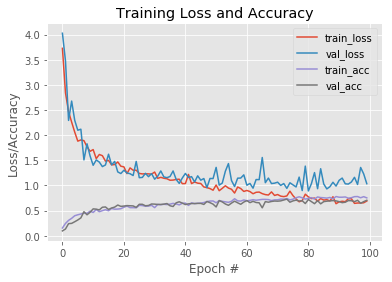

In [6]:
import pycm

# Evaluate the network
print('[INFO] evaluating network...')
predictions = model.predict(testX, batch_size=32)

cm = pycm.ConfusionMatrix(
    actual_vector=lb.inverse_transform(testY),
    predict_vector=lb.inverse_transform(predictions)
)
cm.save_html(r'output/confusion_matrix.html')

# Plot the training loss and accuracy
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100), history.history['loss'], label='train_loss')
plt.plot(np.arange(0, 100), history.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 100), history.history['acc'], label='train_acc')
plt.plot(np.arange(0, 100), history.history['val_acc'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()